In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('../../pipeline')
%load_ext autoreload
%autoreload 2

In [3]:
from selection_validation import * 
from dynamics import * 
from preselection import * 
# from EDA import *

from catboost import CatBoostClassifier

In [80]:
df_train = pd.read_csv('../data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('../data/onetwotrip_challenge_test.csv')

In [5]:
features = list(filter(lambda x: 'field' in x, df_train.columns))

train = df_train.copy()[features + ['orderid', 'userid', 'goal1']]
test = df_test.copy()[features + ['orderid', 'userid']]

del df_train, df_test

wh = pd.concat([train, test])

short_feat = [feat for feat in wh.columns if 2<= wh[feat].value_counts().shape[0] <=32]
len(short_feat)

wh['price'] = (wh['field1'] + 1)*20000

wh = pd.merge(wh, wh.groupby('userid').goal1.agg(['count']).reset_index(), on='userid')

c:\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [89]:
train['field12'].value_counts().sort_index()

1       9714
2      17959
3      20507
4      35039
5      24791
       ...  
268        1
269        1
270        1
272        1
273        1
Name: field12, Length: 270, dtype: int64

In [10]:
for feat in features:
    print(wh[feat].value_counts())
    print('--------------------------------------------')

0      421222
1       11764
2        7964
3        6903
4        6078
        ...  
496         1
498         1
499         1
502         1
507         1
Name: field0, Length: 503, dtype: int64
--------------------------------------------
-0.548937     69415
-0.471365     68709
-0.393794     60662
-0.626508     53536
-0.316223     52086
              ...  
 18.999046        1
 21.093473        1
 33.582462        1
 27.376753        1
 82.142134        1
Name: field1, Length: 317, dtype: int64
--------------------------------------------
7     99896
8     88795
6     83490
10    78398
9     75333
11    72412
12    63499
1     19276
4     18945
3     18905
2     16269
5     15849
Name: field2, dtype: int64
--------------------------------------------
8     92563
7     90962
9     85189
10    78935
12    68540
11    67494
6     54657
1     38109
3     19623
2     19060
4     18370
5     17565
Name: field3, dtype: int64
--------------------------------------------
1      378449
2      118

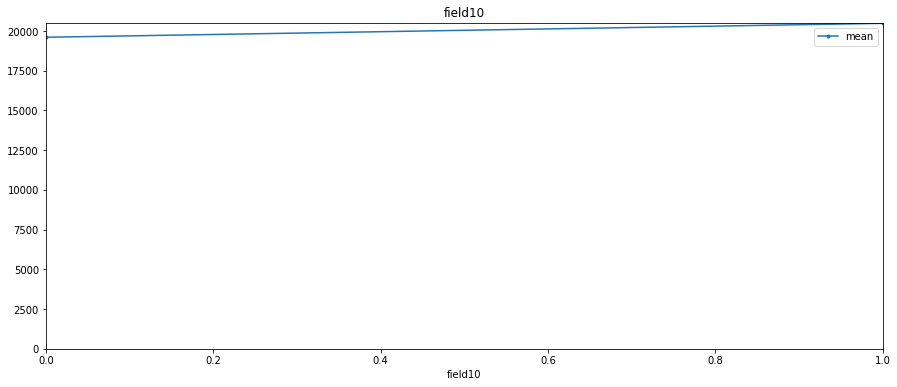

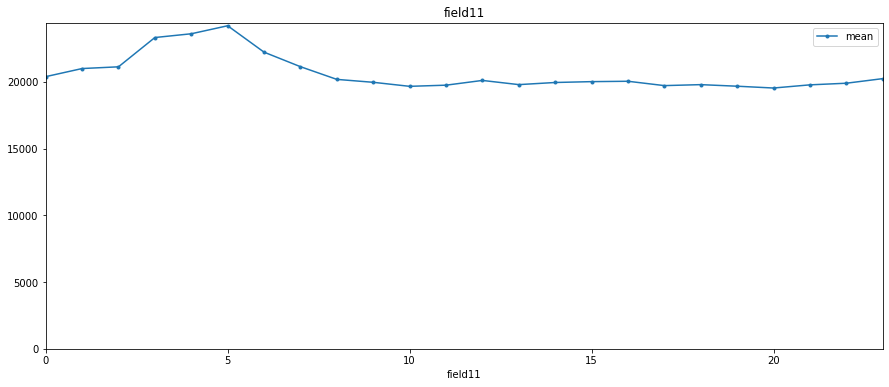

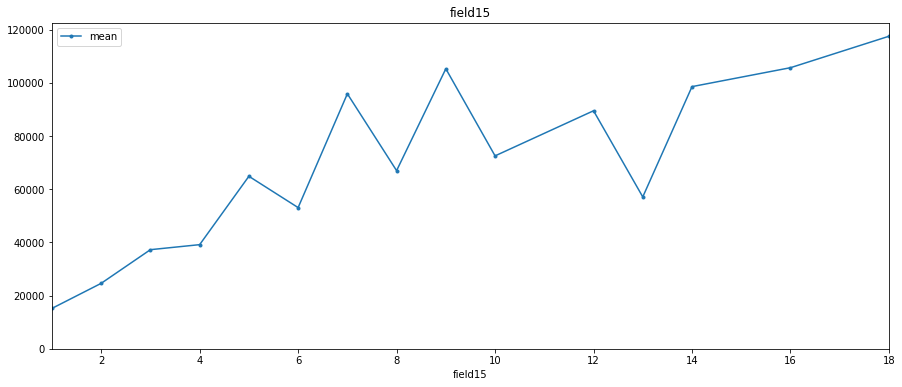

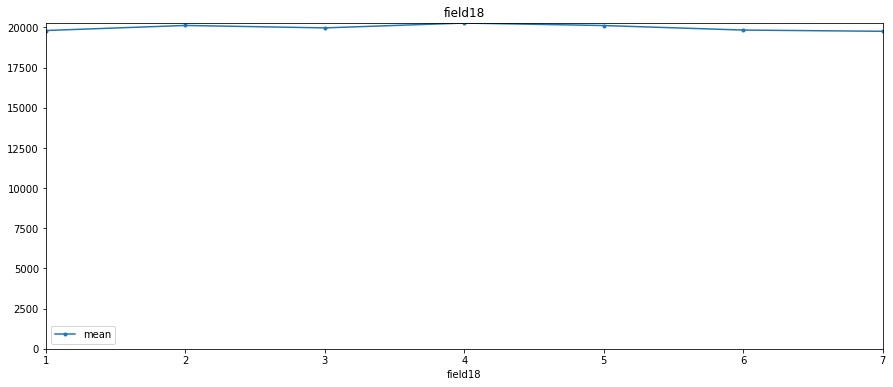

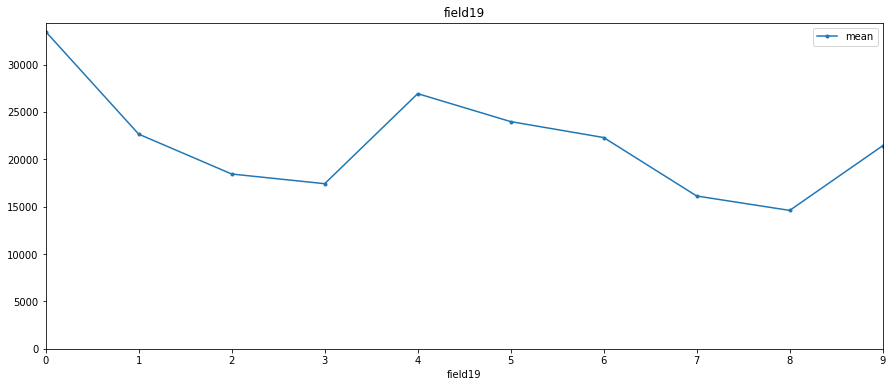

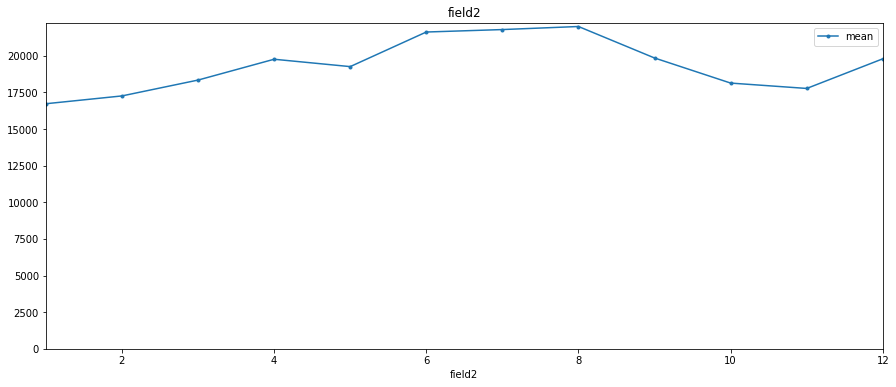

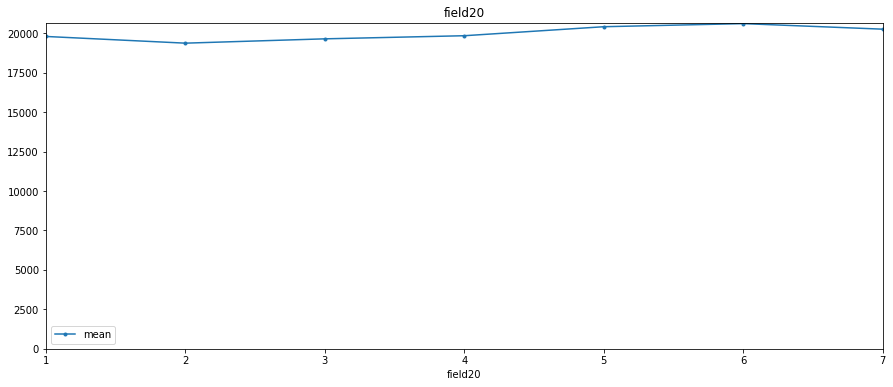

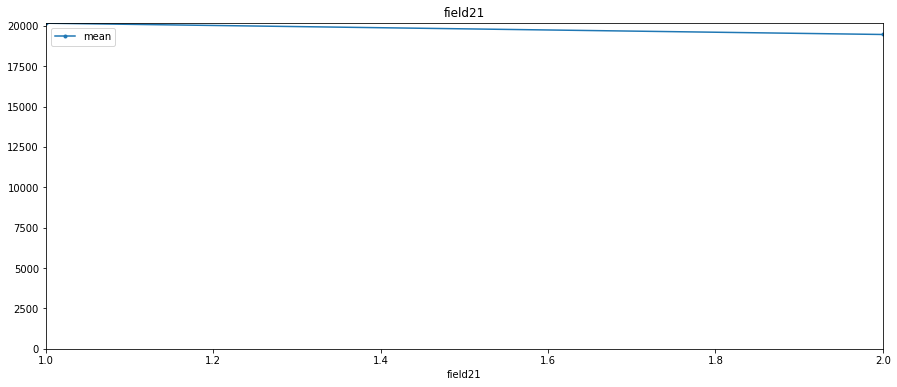

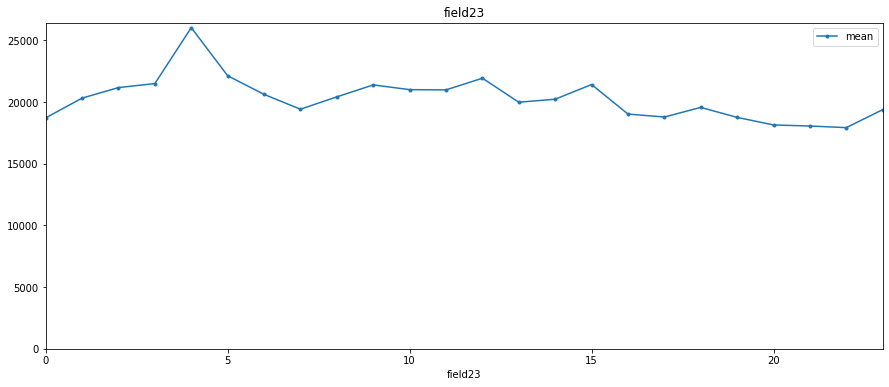

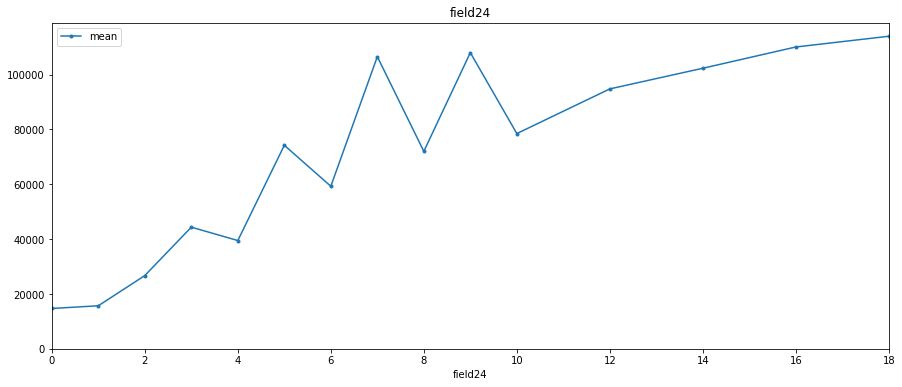

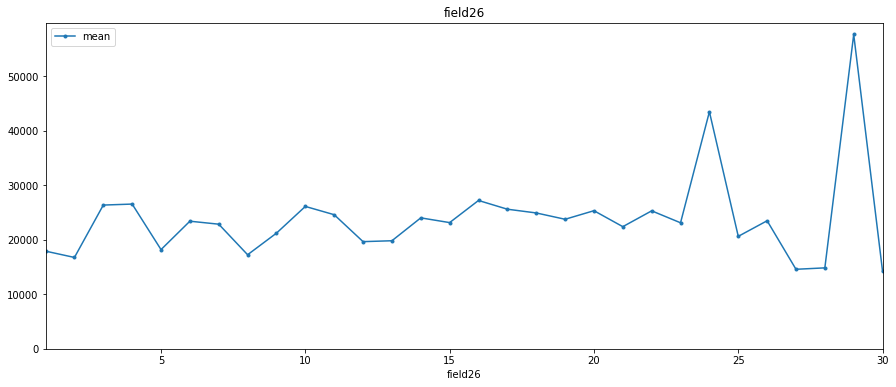

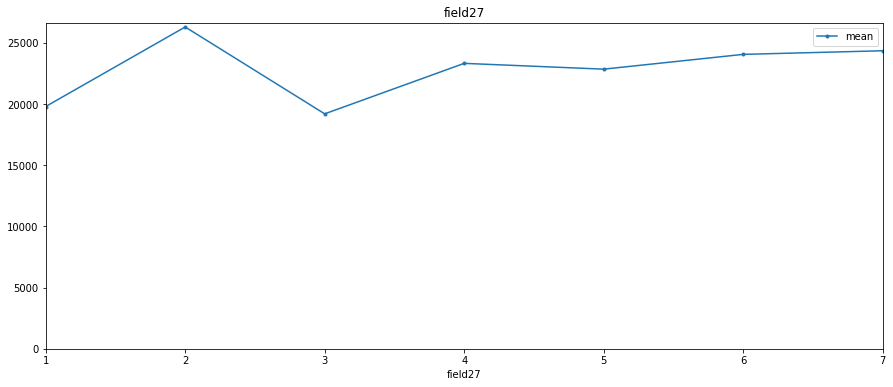

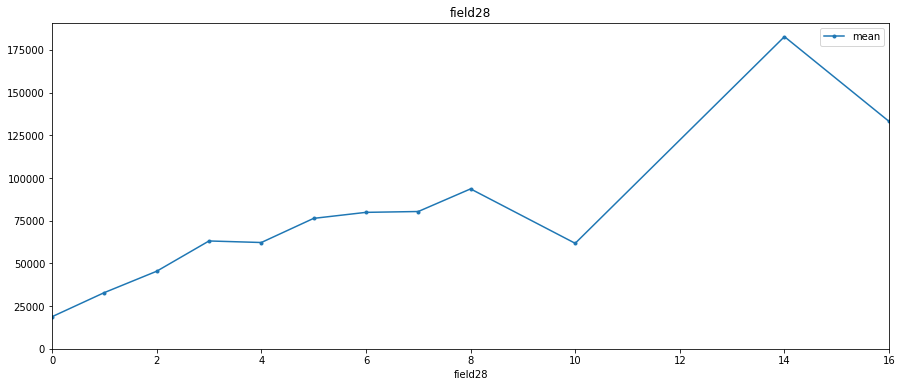

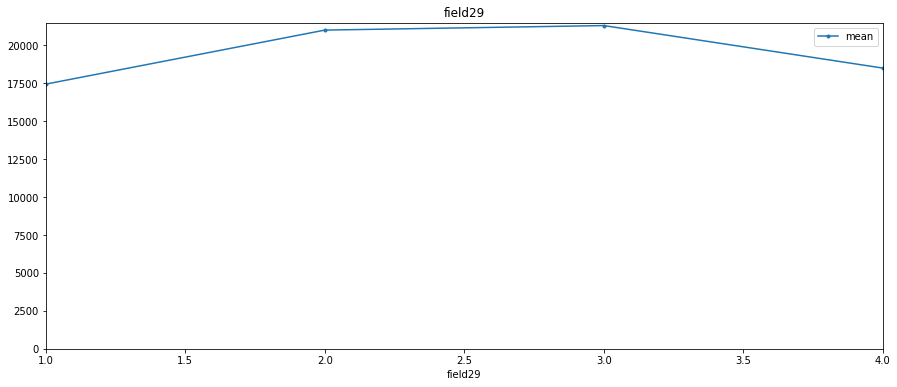

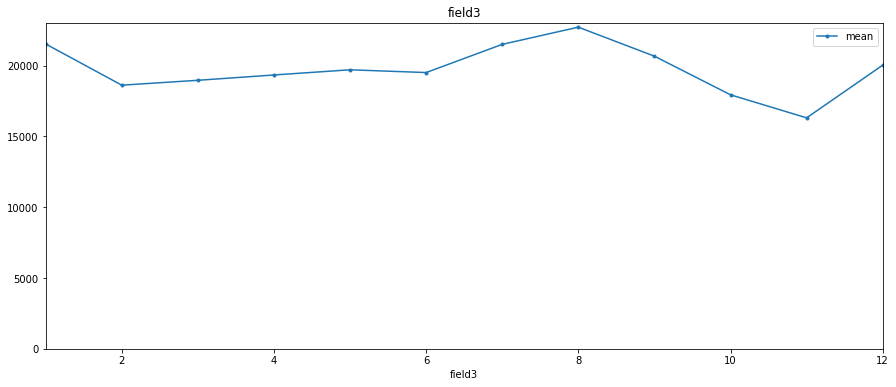

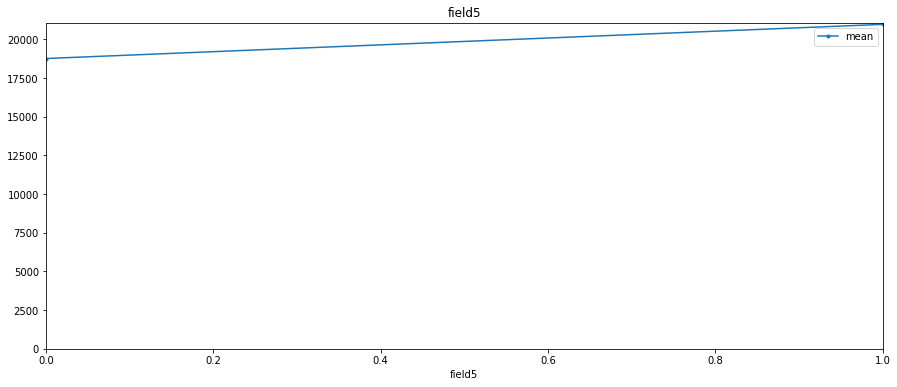

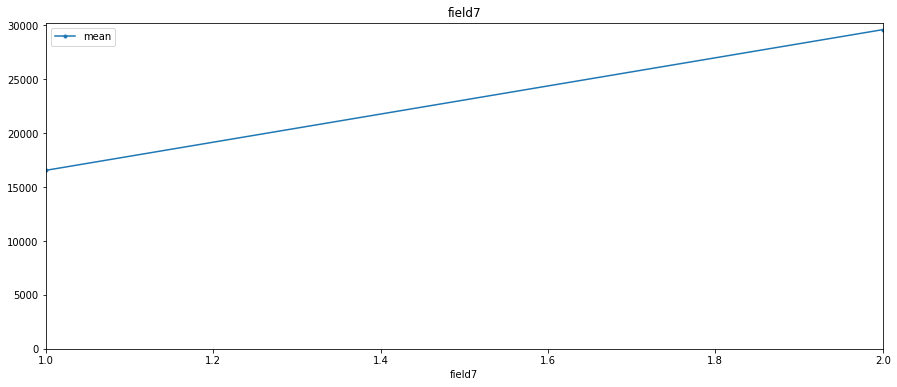

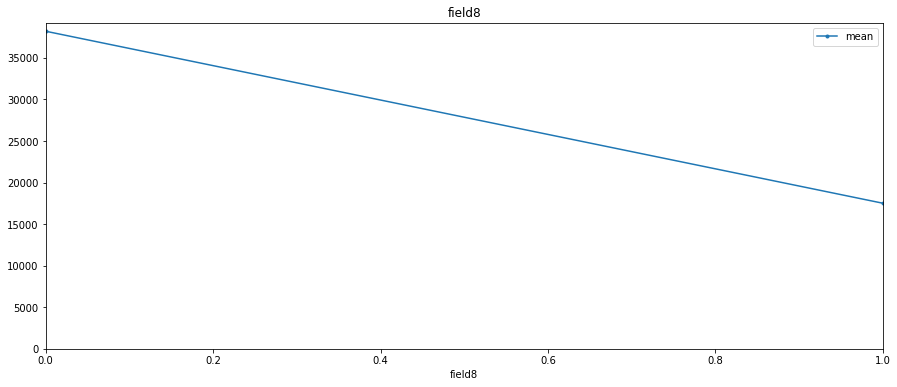

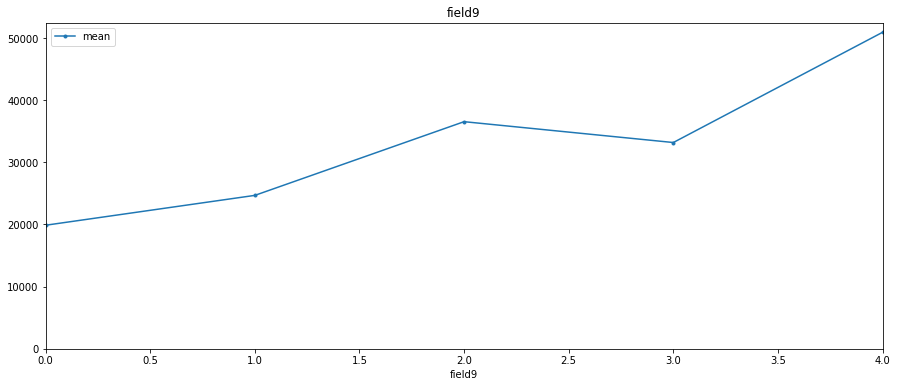

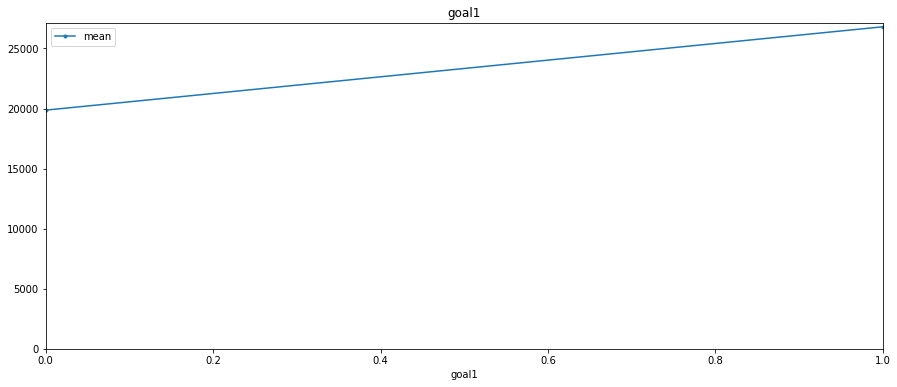

In [50]:
for feat in short_feat:
    wh.groupby(feat).price.agg(['mean']).plot(figsize=(15, 6), style='.-', title=feat)
    plt.ylim(0)

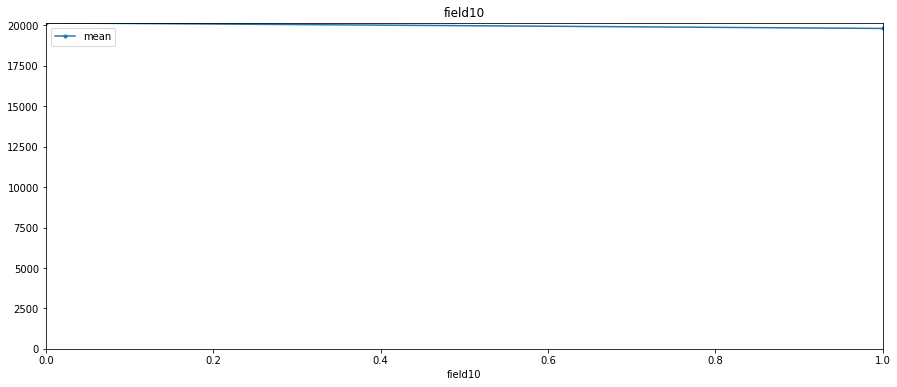

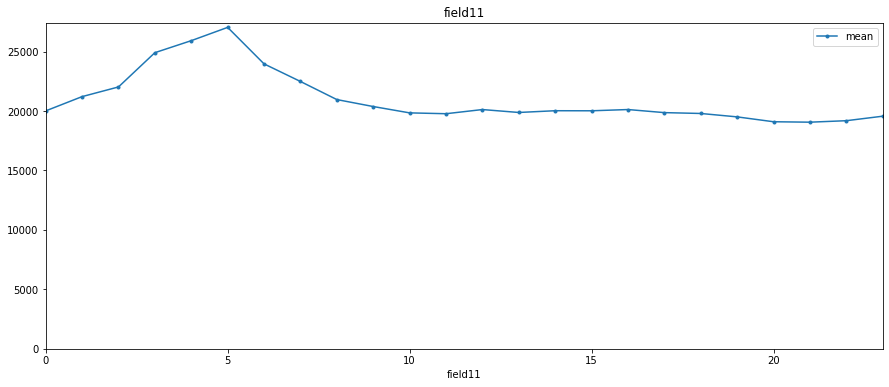

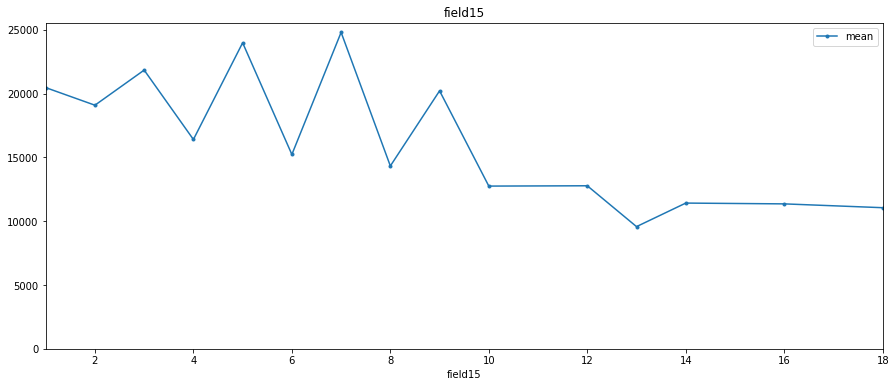

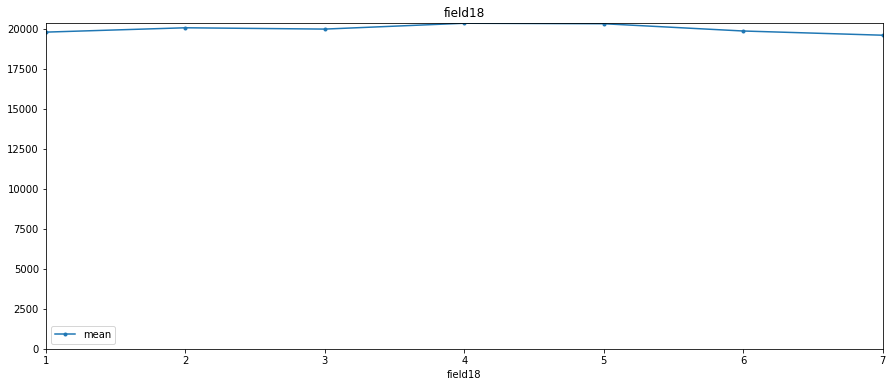

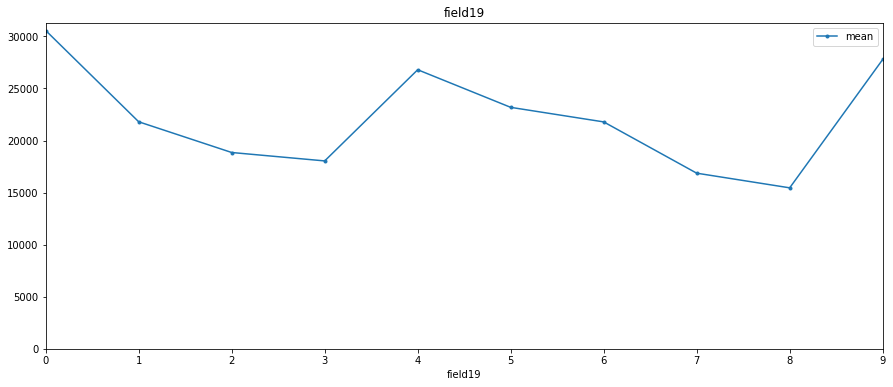

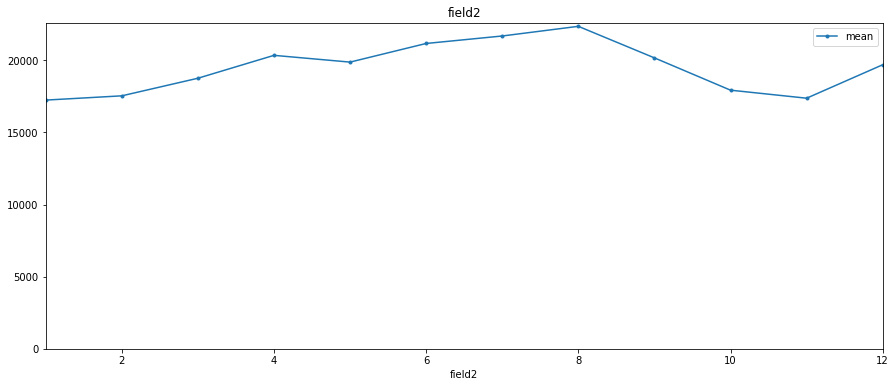

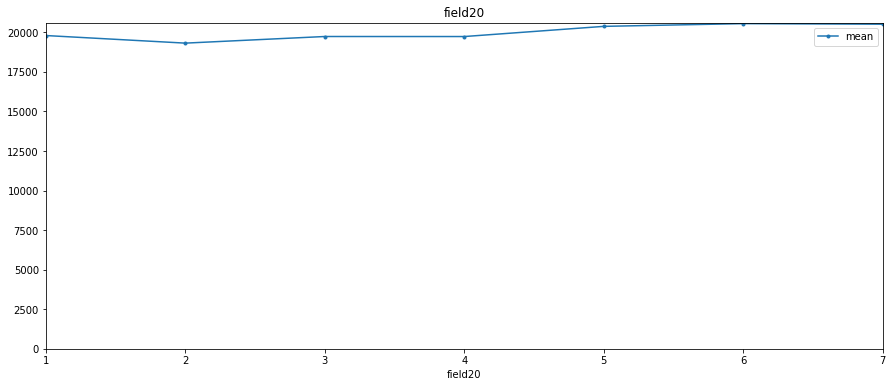

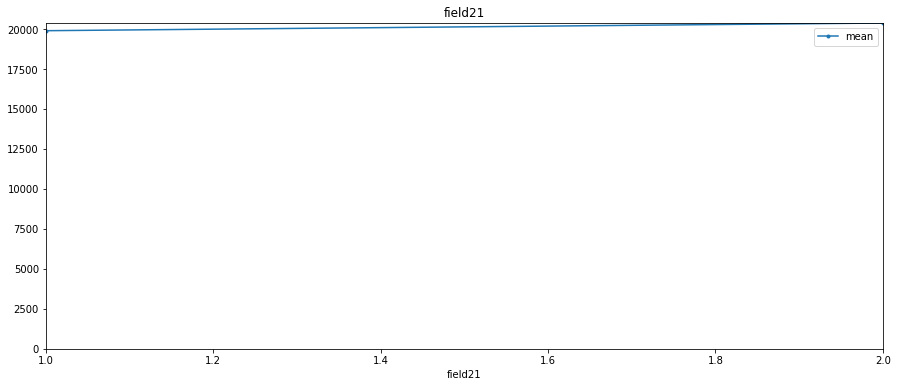

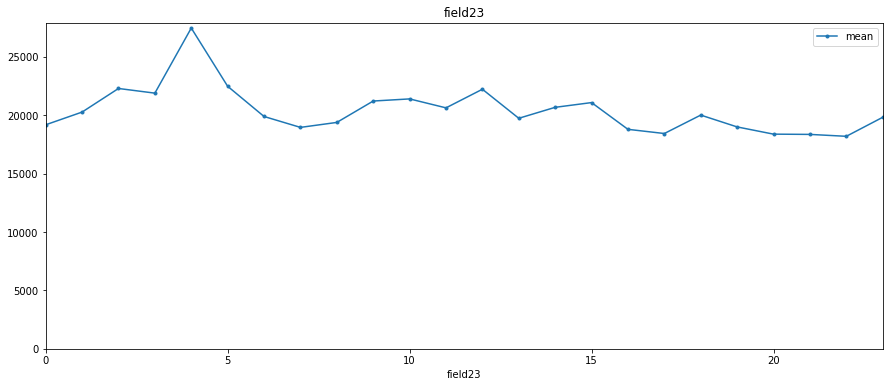

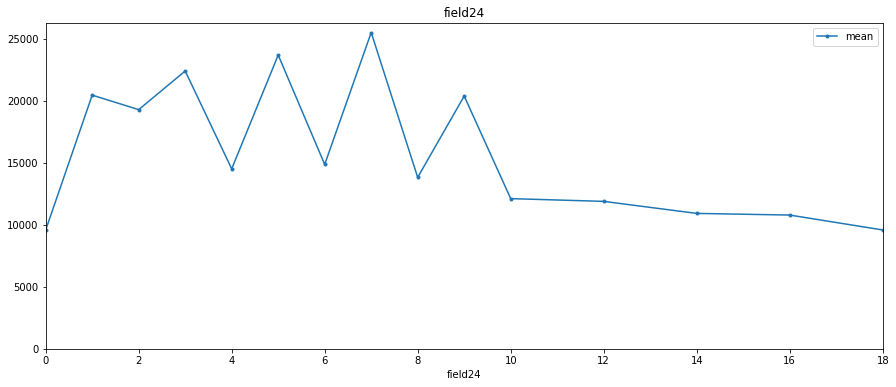

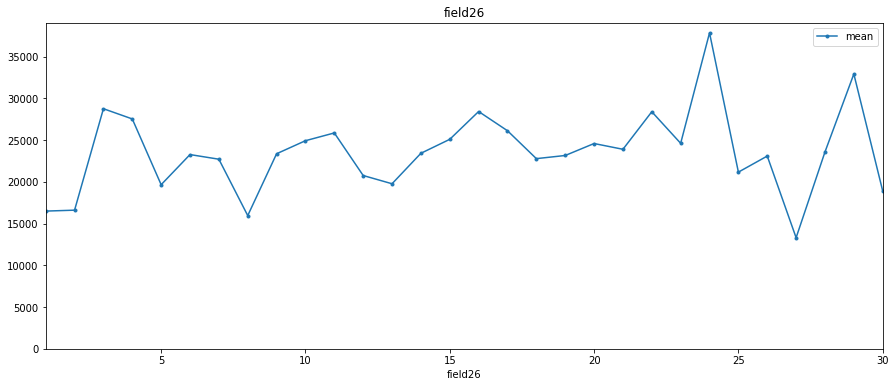

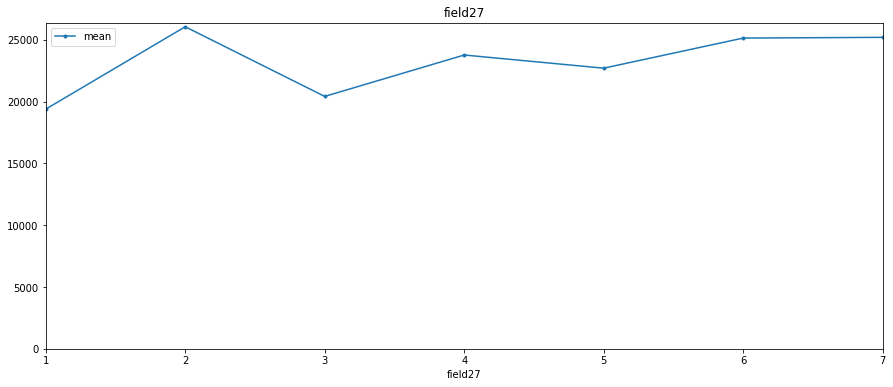

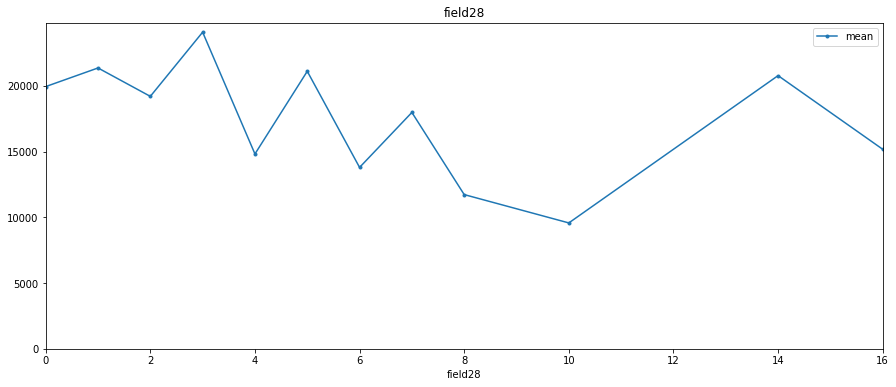

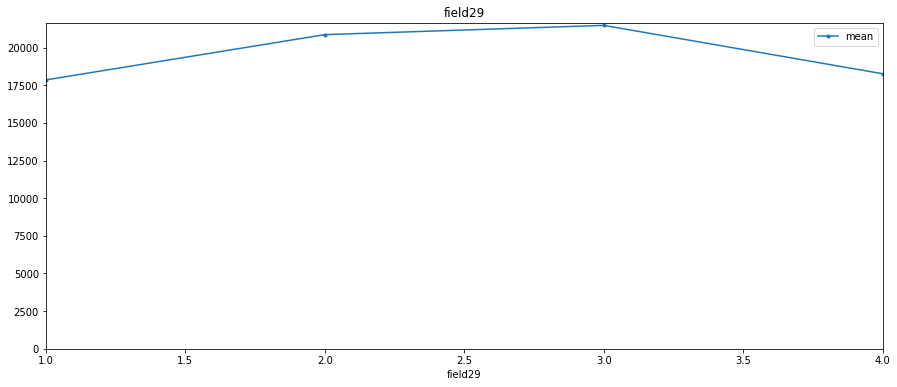

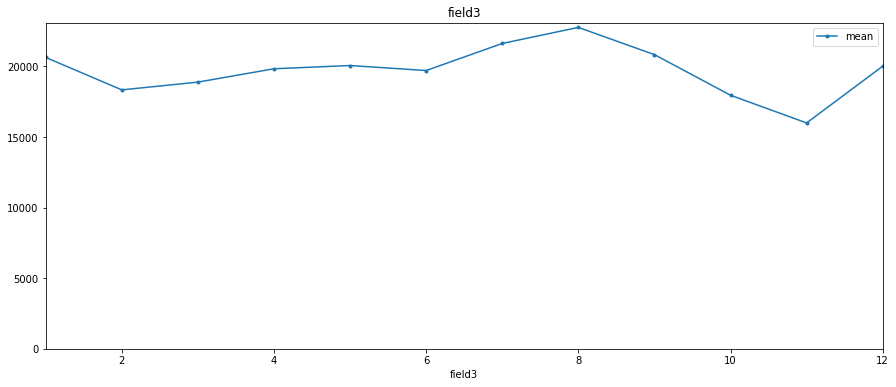

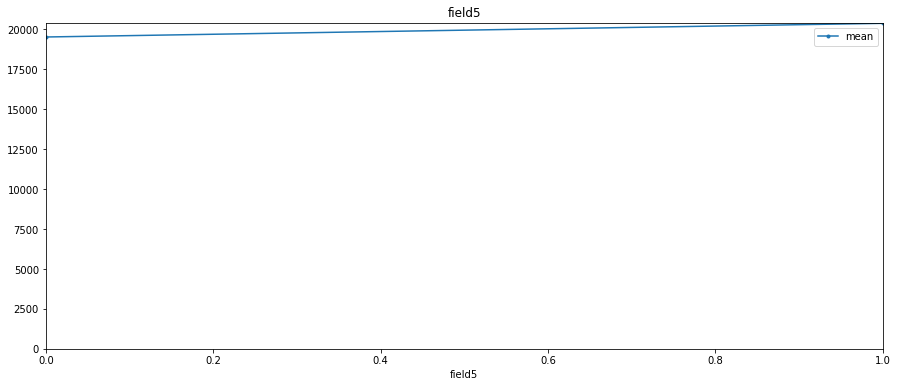

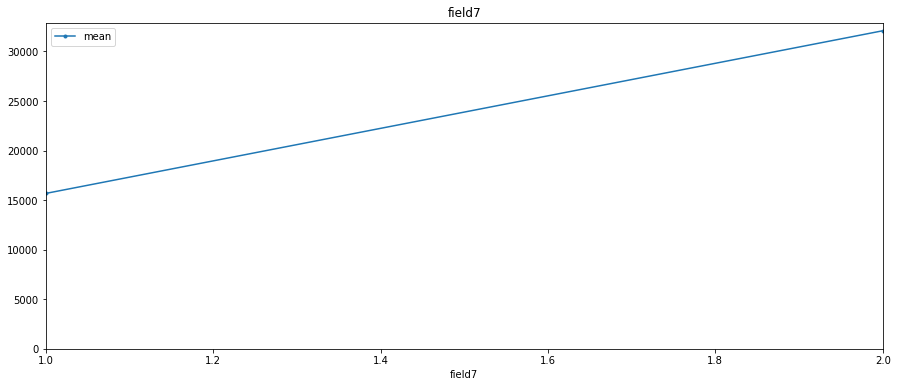

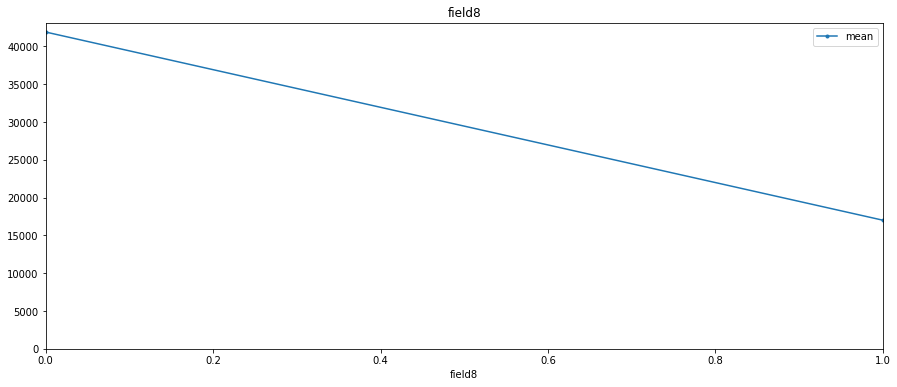

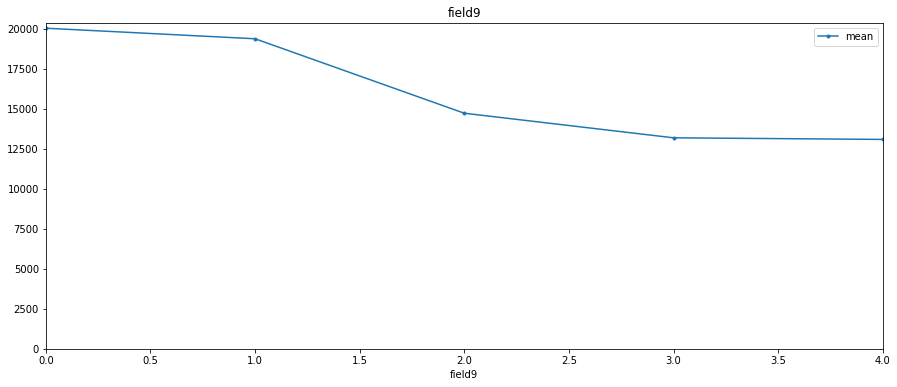

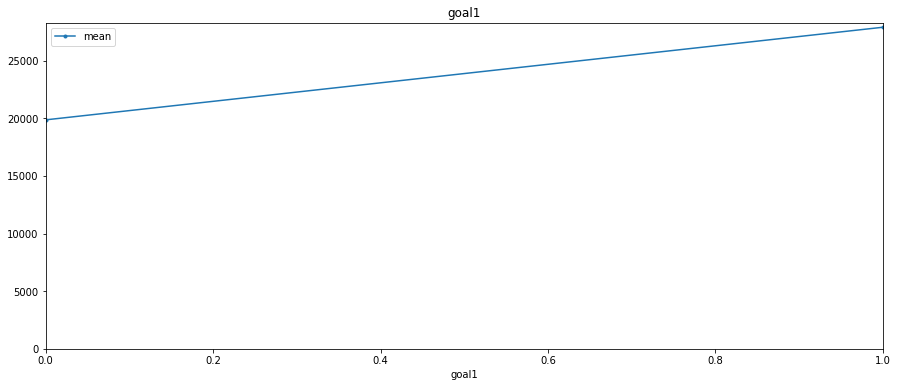

In [76]:
for feat in short_feat:
    wh.groupby(feat).price2.agg(['mean']).plot(figsize=(15, 6), style='.-', title=feat)
    plt.ylim(0)

In [145]:
feat='field25'
# wh.groupby(feat).goal1.agg(['mean']).plot(figsize=(15, 6), style='.-', title=feat)
bins=pd.qcut(wh[feat],23, retbins=True, duplicates='drop')

wh['bins'] = bins[0]
# plt.ylim(0,0.2)
# plt.xlim(25,30)

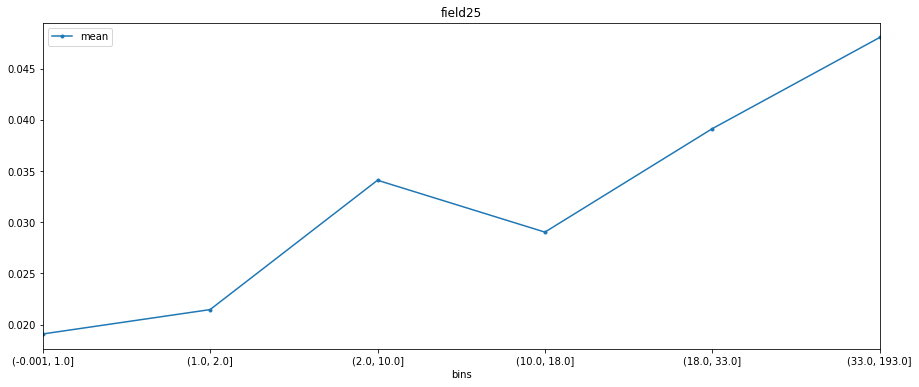

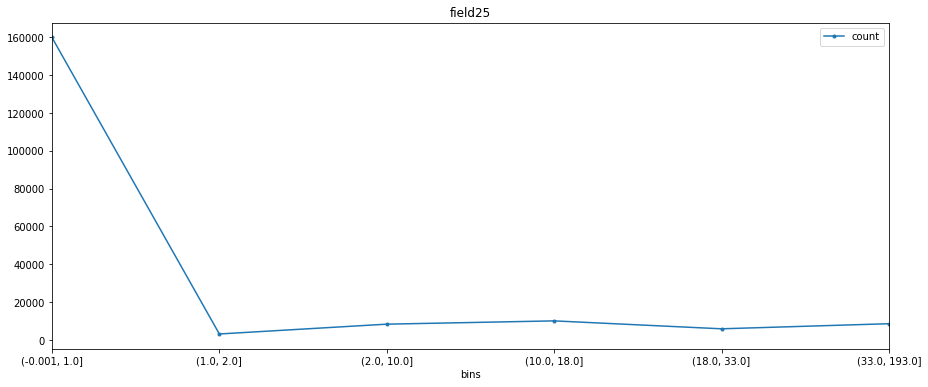

In [146]:
wh.groupby('bins').goal1.agg(['mean']).plot(figsize=(15, 6), style='.-', title=feat)
wh.groupby('bins').goal1.agg(['count']).plot(figsize=(15, 6), style='.-', title=feat)

In [98]:
wh[wh[feat]==56]

,field0,field1,field10,field11,field12,field13,field14,field15,field16,field17,...,field8,field9,goal1,orderid,userid,price,count,price2,price_diff,price_diff2
69757,0,2.166061,0,20,56,418,1.719820,2,2,14,...,1,0,0.0,67693,49ed936c3a19259f9882e7c3d2a65f8fe7141d2bafccc5...,63321.217448,17,54396.404938,1.164070,0.859055
184772,0,0.149205,1,11,56,210,-0.101043,2,23,64,...,1,0,1.0,169920,7d505d7a167a184ade2fe77f7b48a3c64351ebbb53d887...,22984.109788,1,17979.142432,1.278376,0.782242
187131,0,1.002490,1,20,56,97,0.879422,2,9,14,...,0,0,0.0,175056,a395a36b394c498623af24628751a4c77e8c670677cf7a...,40049.809183,1,37588.437627,1.065482,0.938542
204160,0,-0.393794,0,14,56,210,-0.101043,1,89,64,...,1,0,NaN,69580,7253d2a6db4b4c4b8e62dcb03ab5643914ba4e57478d84...,12124.119264,0,17979.142432,0.674344,1.482924
228132,19,-0.161080,1,15,56,184,0.179090,1,10,14,...,1,0,NaN,7596,9f4b5f643f5b97ad0faa6ac5176eae4352f582678a45b1...,16778.400918,0,23581.798202,0.711498,1.405485
228134,0,1.080062,1,9,56,210,0.739355,2,2,64,...,1,0,NaN,115239,9f4b5f643f5b97ad0faa6ac5176eae4352f582678a45b1...,41601.236401,0,34787.109742,1.195881,0.836204
314853,0,0.071634,1,7,56,797,0.599289,1,44,14,...,0,0,NaN,199624,44736db3c5d4d6ce5ae49b9096465d9f51e6c23d18ea35...,21432.682571,0,31985.781857,0.670069,1.492384
458677,0,-0.316223,1,20,56,210,-0.101043,1,2,64,...,1,0,NaN,148195,e38b7fed64556a7e4687c62712cc5da640e41026638d21...,13675.546482,0,17979.142432,0.760634,1.314693
488218,0,-0.083509,1,7,56,200,0.319156,1,3,60,...,1,0,NaN,179237,995aeb2c33fdeffbc5720d96b4b718715ebbfa27f92b64...,18329.828135,0,26383.126087,0.694756,1.439355
528653,0,-0.161080,1,2,56,210,0.319156,1,31,64,...,1,0,NaN,229306,bc51ab28b08fe9e522d7dd1c5281dcf7fb91dac35d9a0f...,16778.400918,0,26383.126087,0.635952,1.572446


In [83]:
print(pd.crosstab(df_train['goal1'], df_train['field7']))

field7       1      2
goal1                
0       141429  50286
1         2615   1726


In [85]:
inds = [x for x in df_train.columns if 'indicator' in x]

for ind in inds:
    print(pd.crosstab(df_train['field7'], df_train[ind]))

indicator_goal21    0       1
field7                       
1                 224  143820
2                 763   51249
indicator_goal22     0       1
field7                        
1                 3364  140680
2                  626   51386
indicator_goal23      0      1
field7                        
1                 95178  48866
2                 32518  19494
indicator_goal24      0      1
field7                        
1                 51262  92782
2                 18190  33822
indicator_goal25      0       1
field7                         
1                 41377  102667
2                 27696   24316


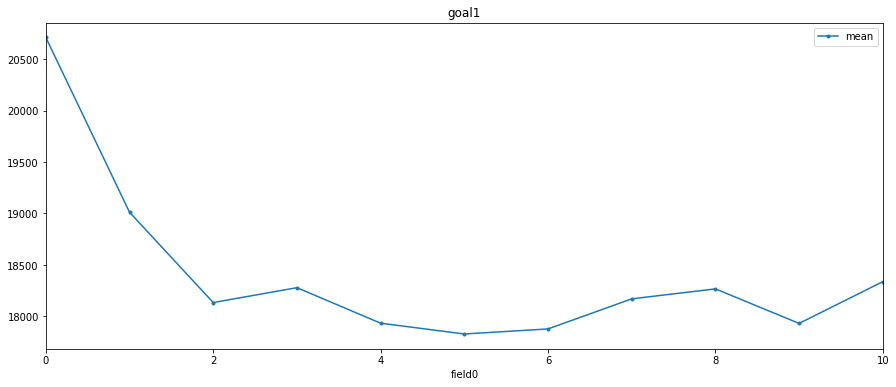

In [87]:
wh[wh['field0'] <=10].groupby('field0').price.agg(['mean']).plot(figsize=(15, 6), style='.-', title=feat)

wh[wh['field0'] <=100].field0.value_counts()

In [8]:
wh['price2'] = (wh['field14'] + 1)*20000

In [19]:
wh[['price', 'price2']].corr()

,price,price2
price,1.000000,0.772518
price2,0.772518,1.000000


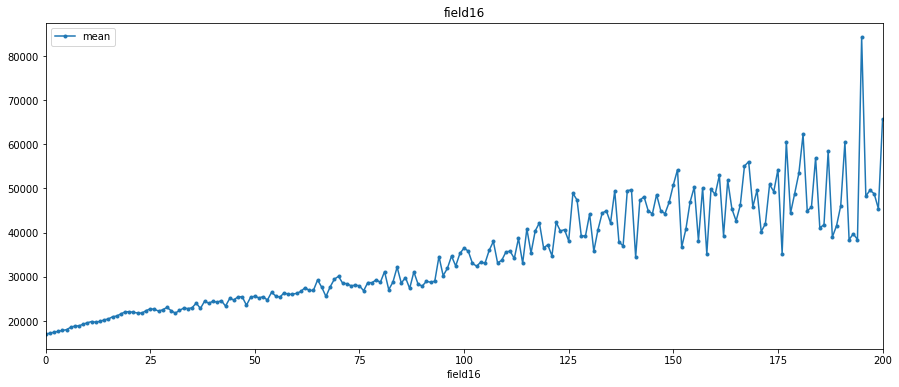

In [49]:
col = 'field16'
ind = 200
wh[wh[col] <= ind].groupby(col).price.agg(['mean']).plot(figsize=(15, 6), style='.-', title=col)

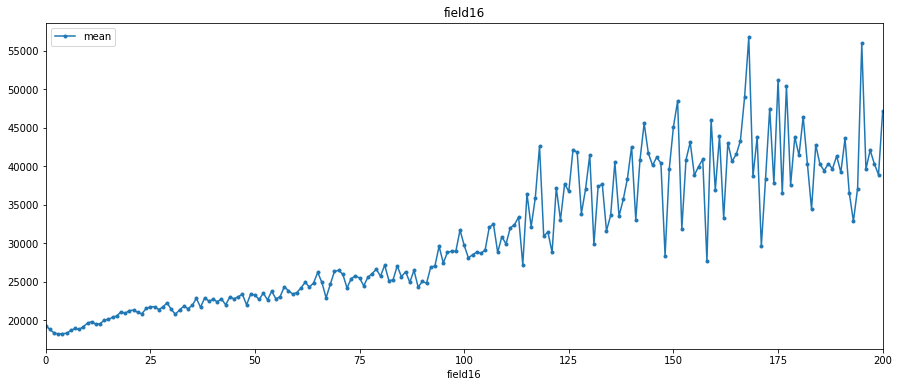

In [50]:
col = 'field16'
ind = 200
wh[wh[col] <= ind].groupby(col).price2.agg(['mean']).plot(figsize=(15, 6), style='.-', title=col)

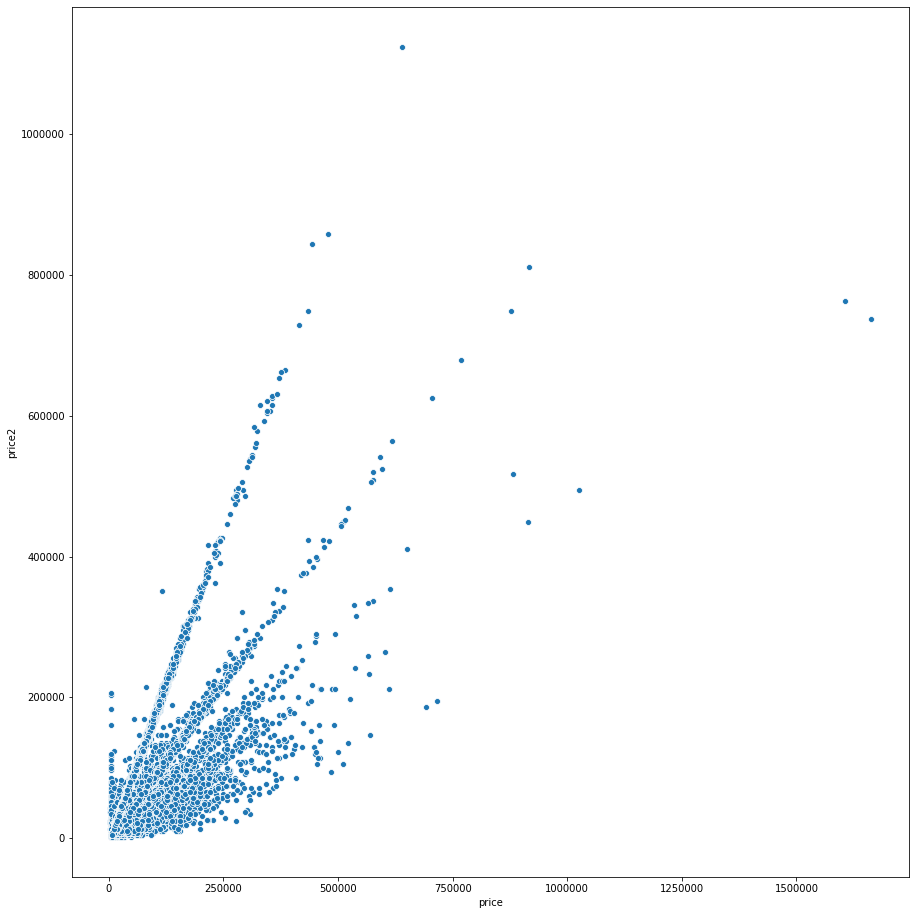

In [59]:
plt.figure(figsize=(15, 16))
sns.scatterplot(wh['price'], wh['price2'])

In [65]:
wh['price_diff'] = wh['price']/wh['price2']
wh['price_diff2'] = wh['price2']/wh['price']

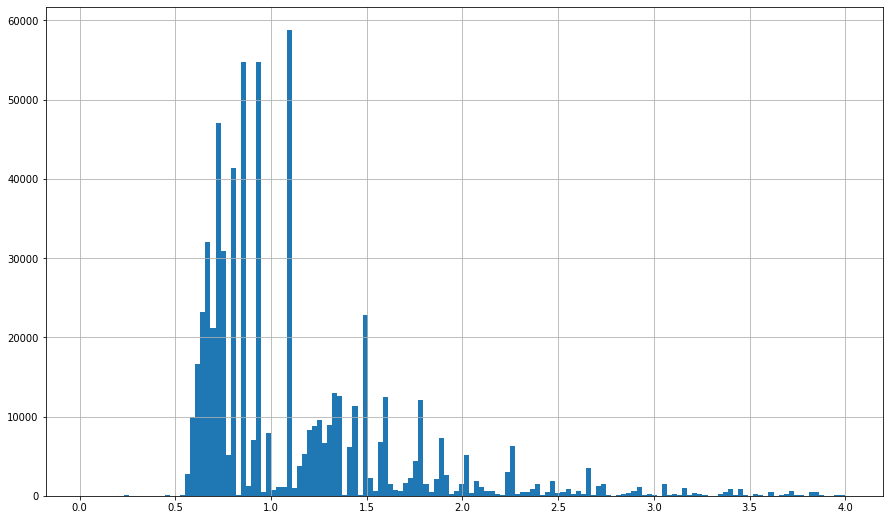

In [64]:
plt.figure(figsize=(15, 9))
wh[wh['price_diff'] < 4]['price_diff'].hist(bins=150)

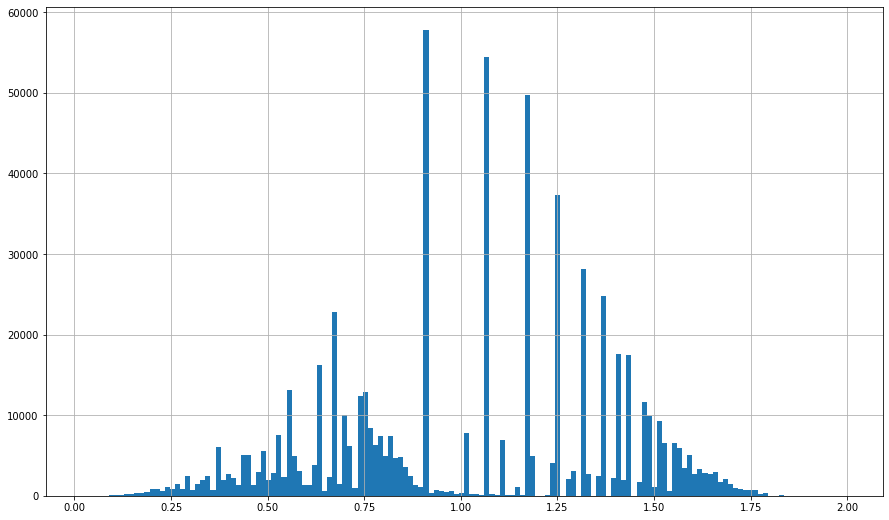

In [69]:
plt.figure(figsize=(15, 9))
wh[wh['price_diff2'] < 2]['price_diff2'].hist(bins=150)

In [153]:
wh[wh[col] <= ind][col].value_counts()

1     259504
2     138314
3      70359
4      41968
5      26210
6      18042
7      13461
8       9976
9       8307
10      6500
11      5225
12      4500
13      3588
14      3332
15      2850
16      2352
18      2340
17      2176
19      2014
20      1520
Name: count, dtype: int64

In [155]:
wh['field6'].value_counts()

0      507637
1       21731
3       18410
2       18295
4       13844
        ...  
183         1
188         1
189         1
192         1
344         1
Name: field6, Length: 212, dtype: int64

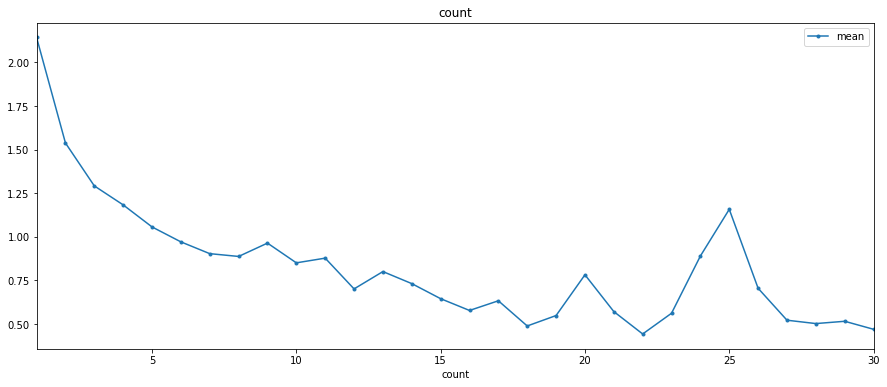

In [159]:
col = 'count'
ind = 30
wh[wh[col] <= ind].groupby(col).field6.agg(['mean']).plot(figsize=(15, 6), style='.-', title=col)

['indicator_goal21',
 'indicator_goal22',
 'indicator_goal23',
 'indicator_goal24',
 'indicator_goal25']

In [114]:
for ind in inds:
    print(pd.crosstab(df_train['goal1'], df_train[ind]))
    

indicator_goal21    0       1
goal1                        
0                 945  190770
1                  42    4299
indicator_goal22     0       1
goal1                         
0                 3928  187787
1                   62    4279
indicator_goal23       0      1
goal1                          
0                 124894  66821
1                   2802   1539
indicator_goal24      0       1
goal1                          
0                 68290  123425
1                  1162    3179
indicator_goal25      0       1
goal1                          
0                 67342  124373
1                  1731    2610


In [128]:
print(42/945, 4299/190770)

0.044444444444444446 0.022534989778267022


In [129]:
print(62/3928, 4279/187787)

0.015784114052953158 0.022786454866417803


In [130]:
print(2802/124894,1539/66821)

0.022435024901116145 0.023031681656964127


In [131]:
print(1162/68290,3179/123425)

0.01701566847269 0.02575653230706907


In [132]:
print(1731/67342,2610/124373)

0.02570461227762763 0.020985262074566025


In [63]:
whole = pd.concat([df_train, df_test])

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [64]:
whole['price'] = wh['price']

In [68]:
for item in [x for x in df_train.columns if 'indicator' in x]:
    print( '\n', whole.groupby(item).price.agg(['mean']))
    print( '\n', whole[item].value_counts())


                           mean
indicator_goal21              
0                 31261.080908
1                 19943.242798

 1    647802
0      3265
Name: indicator_goal21, dtype: int64

                           mean
indicator_goal22              
0                 15674.023039
1                 20089.362427

 1    637890
0     13177
Name: indicator_goal22, dtype: int64

                           mean
indicator_goal23              
0                 19105.911086
1                 21672.371800

 0    424252
1    226815
Name: indicator_goal23, dtype: int64

                           mean
indicator_goal24              
0                 19475.964858
1                 20288.123089

 1    420093
0    230974
Name: indicator_goal24, dtype: int64

                           mean
indicator_goal25              
0                 24283.950921
1                 17672.344861

 1    421855
0    229212
Name: indicator_goal25, dtype: int64


In [72]:
whole[(whole['indicator_goal21'] == 1) & 
      (whole['indicator_goal22'] == 0) &
      (whole['indicator_goal23'] == 0) &
      (whole['indicator_goal24'] == 0) &
      (whole['indicator_goal25'] == 1)
     ]['price'].mean()

12514.83910219955

# EDA

- все фичи численные
- пропусков нигде нет
- уникальных клиентов в трейне 113902, записей в трейне 196056
- уникальных клиентов в тесте 264547, записей в тесте 455011
- бэдрейт 2.2%
- у клиентов до 363 заказов
- у 1834 клиентов все заказы плохие (от 1 до 4)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196056 entries, 0 to 196055
Data columns (total 31 columns):
field0     196056 non-null int64
field1     196056 non-null float64
field2     196056 non-null int64
field3     196056 non-null int64
field4     196056 non-null int64
field5     196056 non-null int64
field6     196056 non-null int64
field7     196056 non-null int64
field8     196056 non-null int64
field9     196056 non-null int64
field10    196056 non-null int64
field11    196056 non-null int64
field12    196056 non-null int64
field13    196056 non-null int64
field14    196056 non-null float64
field15    196056 non-null int64
field16    196056 non-null int64
field17    196056 non-null int64
field18    196056 non-null int64
field19    196056 non-null int64
field20    196056 non-null int64
field21    196056 non-null int64
field22    196056 non-null int64
field23    196056 non-null int64
field24    196056 non-null int64
field25    196056 non-null int64
field26    196056 non-null 

In [26]:
train.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
field0,28.413163,69.603944,0.000000,0.000000,500.000000
field1,0.000912,1.009651,-0.859222,-0.238651,82.142134
field2,7.980363,2.757008,1.000000,8.000000,12.000000
field3,7.867864,3.013659,1.000000,8.000000,12.000000
field4,3.528966,12.692057,1.000000,1.000000,363.000000
field5,0.556214,0.496831,0.000000,1.000000,1.000000
field6,1.577911,5.614900,0.000000,0.000000,323.000000
field7,1.265292,0.441489,1.000000,1.000000,2.000000
field8,0.879366,0.325702,0.000000,1.000000,1.000000
field9,0.023937,0.164366,0.000000,0.000000,4.000000


In [61]:
print(test.userid.unique().shape, test.shape)

(264547,) (455011, 32)


In [32]:
print(train['goal1'].shape[0], train['goal1'].sum(), train['goal1'].mean(), train['goal1'].mean())

196056 4341 0.022141633002815523 0.022141633002815523


In [118]:
bad = train.groupby('userid')['goal1'].agg(['count', 'mean'])
bad.sort_values(by='count', ascending=False)

,count,mean
userid,,
a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52,363,0.027548
98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b,222,0.072072
a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4,185,0.005405
6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67,177,0.016949
13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa,149,0.000000
e139cfdfd8ccc2813af314294b72bcf5b2c0b294a6813b8ff485bbcf03dc0e28,145,0.055172
13307da7ee5cb7fd235c34271141925f6a73401f250cac6ea89ea8f2a38c0c3e,130,0.000000
fb9e1f449cf22ca0bc6ed784dd01f4aae2be1d1df255f9e0e644c6353512116c,122,0.008197
976fce59d2846df18470ebe89dacbe48fb8606f0c9c0e0f263cdbb59df054115,110,0.000000


In [122]:
bad[bad['mean'] == 1].sort_values(by='count', ascending=False)

,count,mean
userid,,
f752322b4ddeacc4b6472bd25ec976118f08b3b8e43bcf955b274faf9e4a441a,4,1.0
bd54437c658f1ec6fab7e252d82ec72ec629f41b0104dba362b2524f28652db6,3,1.0
c5d45e955a4fc0b8dca11807d48881919081e49a86704d1c2fdb81e40b0245d6,3,1.0
41b1f0b7275f90a4fa4d41a36393438d6466c7da5033e401b1180126e3e04020,3,1.0
580f7a89ea492b7762fca787d093818cd3cce68f6b3d4d0add3ab2ca45802ac7,3,1.0
c367edf830be93279066ac1324f77e614605059d7280e7f1bef615be1bd2599b,3,1.0
db94a2d18b85f132af9aec1b9b8e32762ee8cd4707b08f55de0f763b0ac601f9,3,1.0
3efd850616a1a63bec9f163465878b9afc926b539a1cedcd597302a7800eea21,2,1.0
3610f0de0913537070f948ab1076a0f368d74c5375a345fd4cbb8c1dc1eef97c,2,1.0


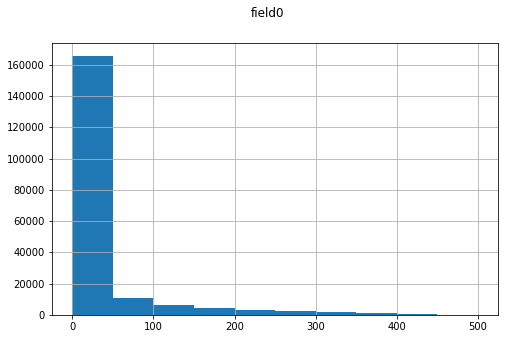

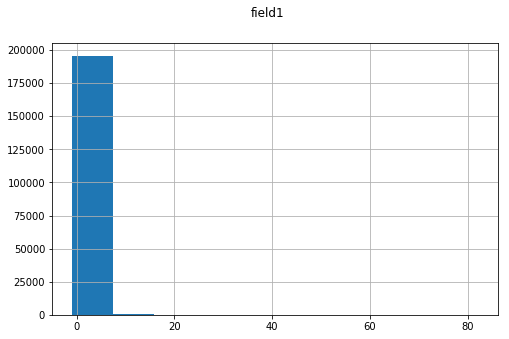

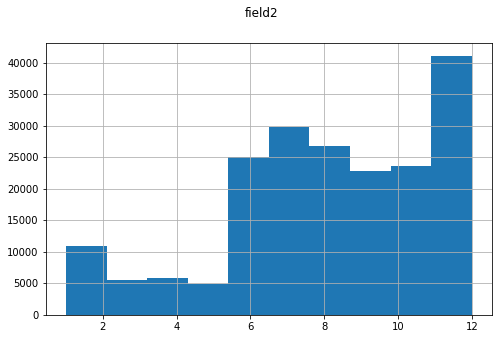

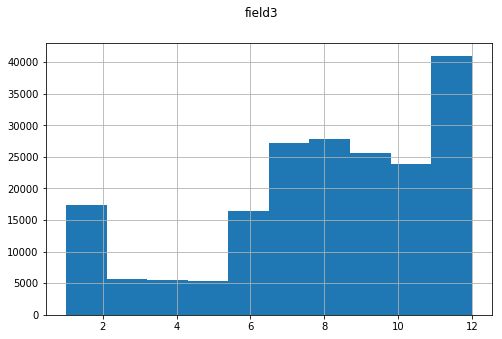

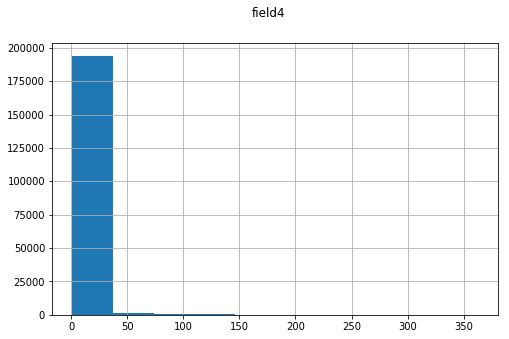

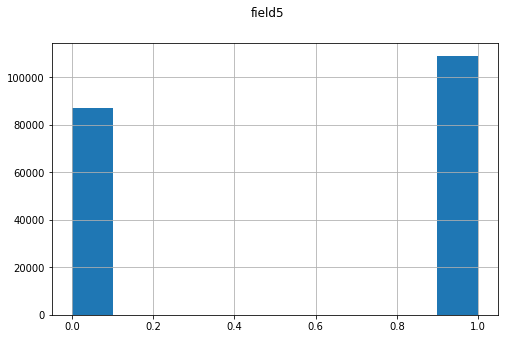

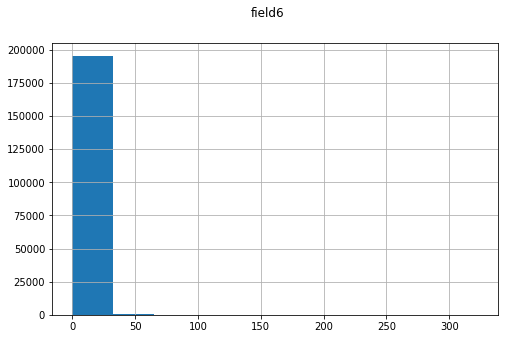

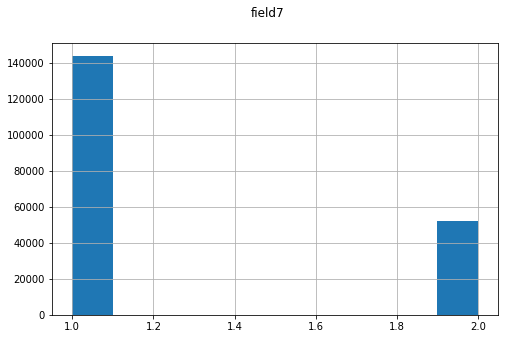

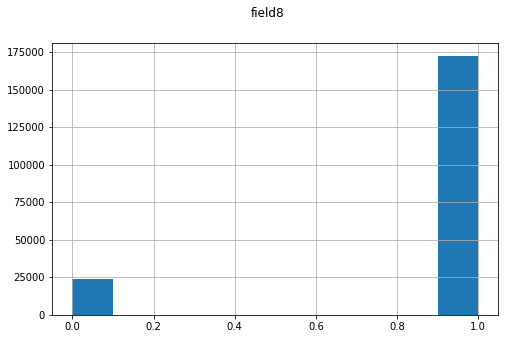

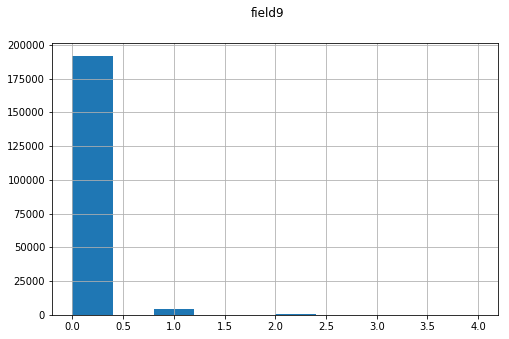

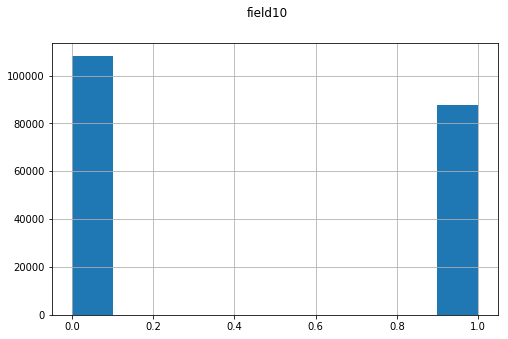

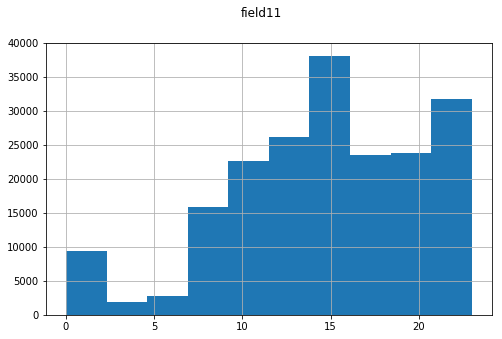

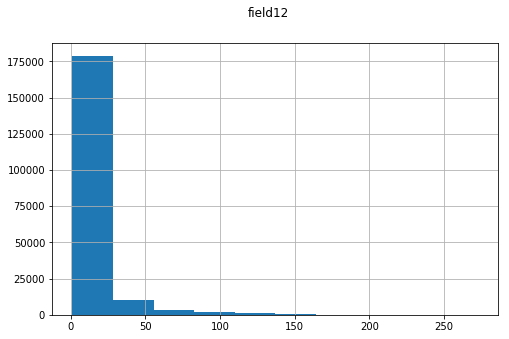

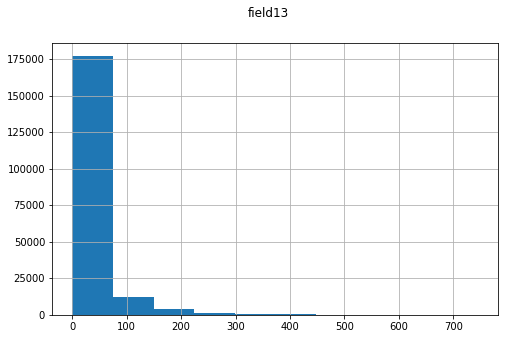

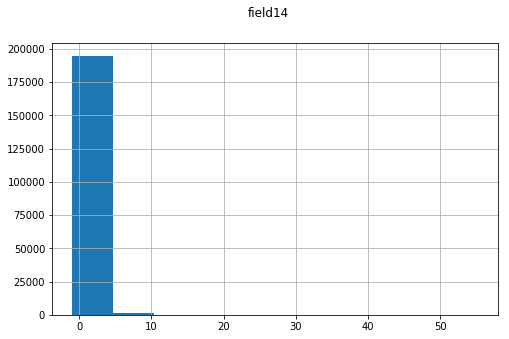

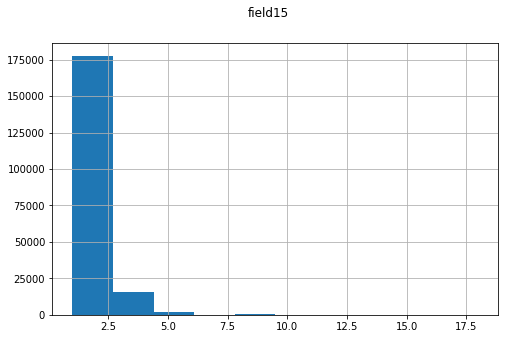

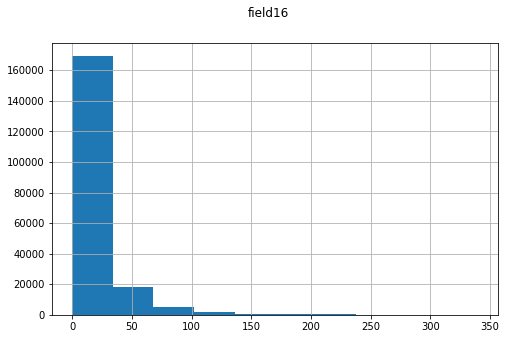

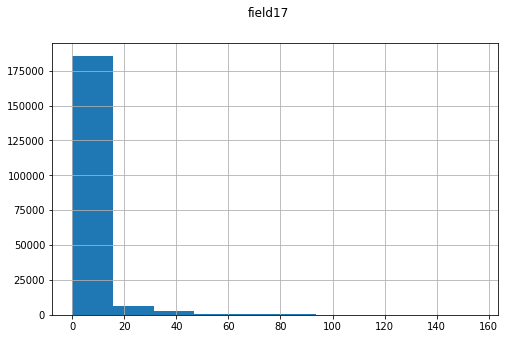

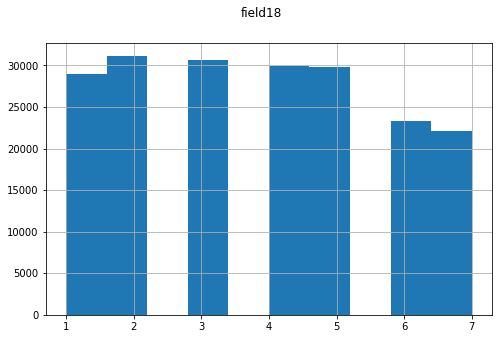

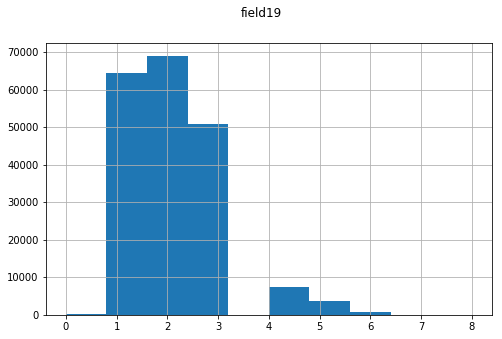

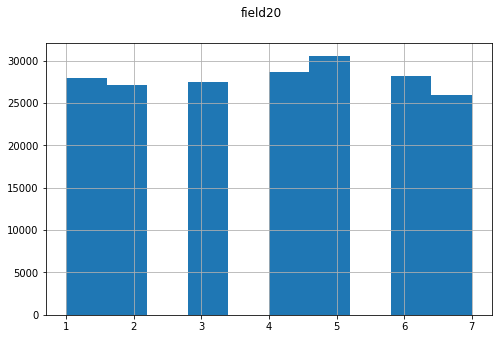

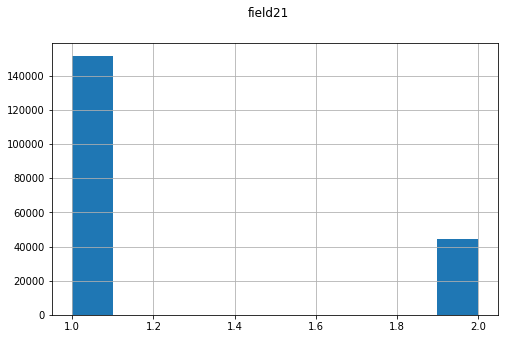

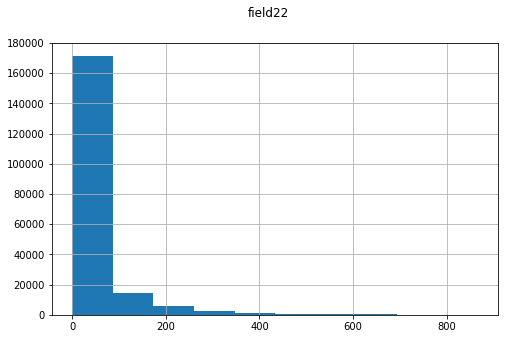

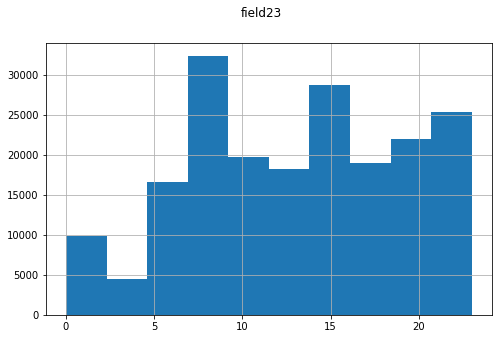

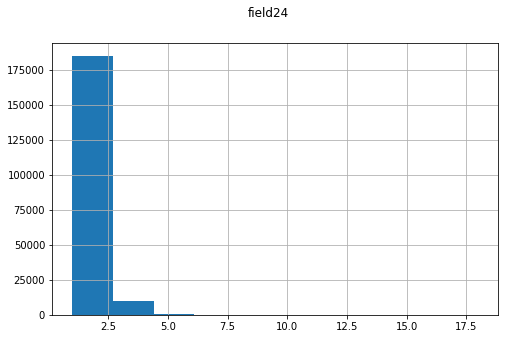

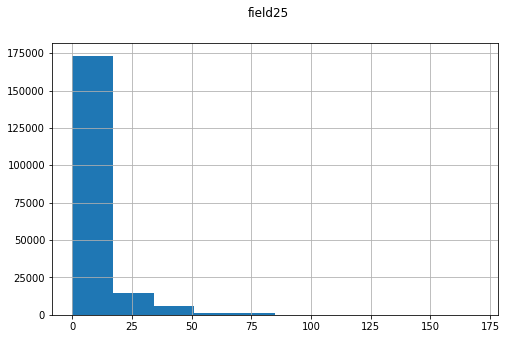

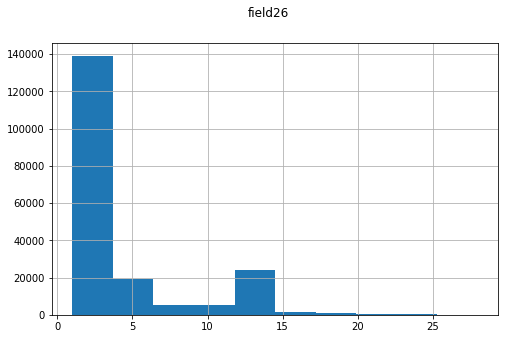

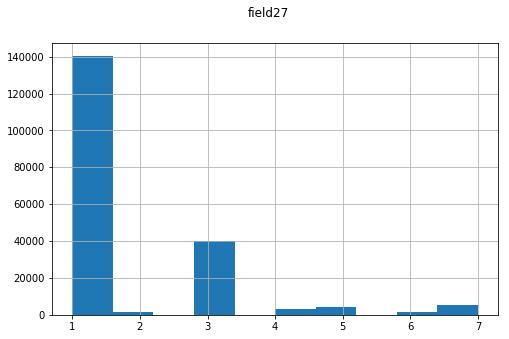

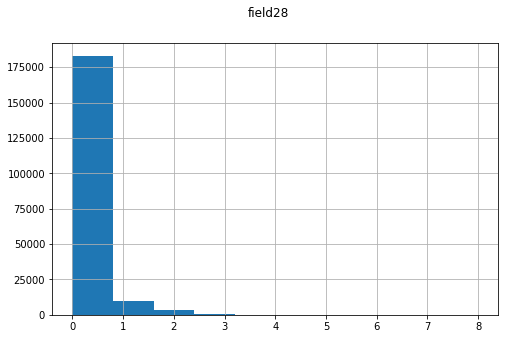

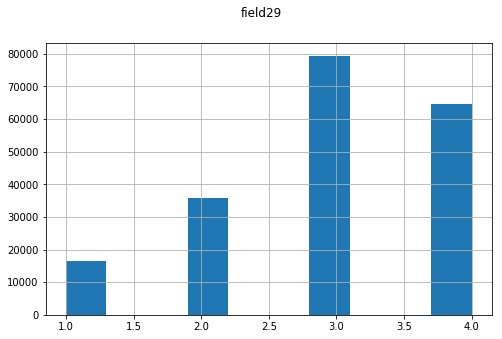

In [124]:
for feat in features:
    plt.figure(figsize=(8, 5))
    train[feat].hist()
#     print(train[feat].value_counts())
    plt.suptitle(feat)

In [65]:
for feat in features:
    print(train[feat].value_counts())

0      126851
1        3457
2        2374
3        2063
4        1832
5        1709
6        1488
7        1449
8        1275
9        1127
10       1033
11       1001
12        960
13        902
14        890
16        838
15        834
18        711
17        694
21        688
19        679
20        675
22        634
25        584
24        574
27        555
23        554
26        534
28        529
29        525
        ...  
451         3
471         3
453         3
457         3
436         3
476         3
467         3
464         3
470         2
468         2
472         2
474         2
439         2
485         2
487         2
482         2
452         1
500         1
496         1
473         1
428         1
495         1
475         1
454         1
491         1
489         1
477         1
466         1
463         1
462         1
Name: field0, Length: 486, dtype: int64
-0.548937     20712
-0.471365     20669
-0.393794     18078
-0.626508     16014
-0.316223     15872
-0.238

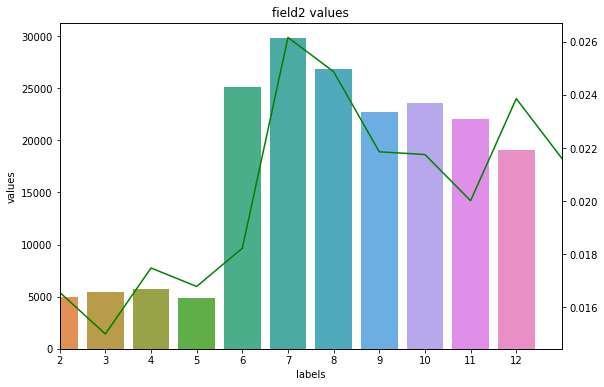

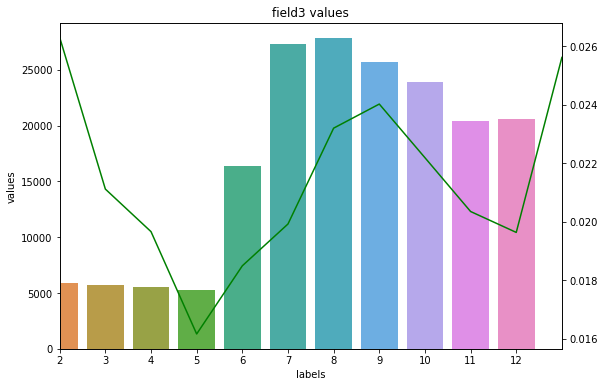

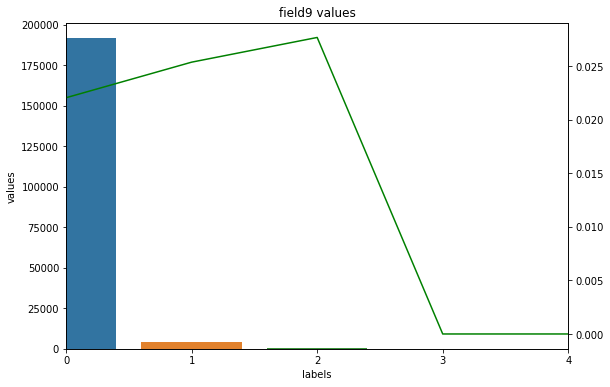

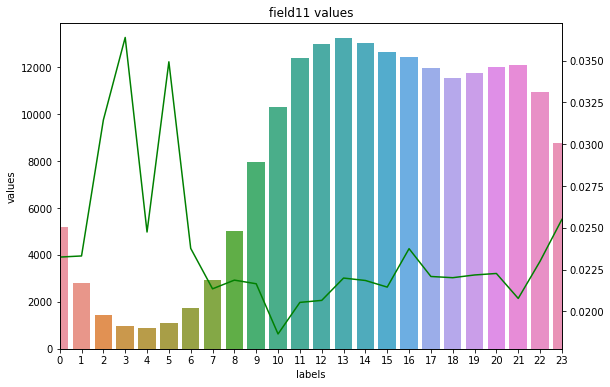

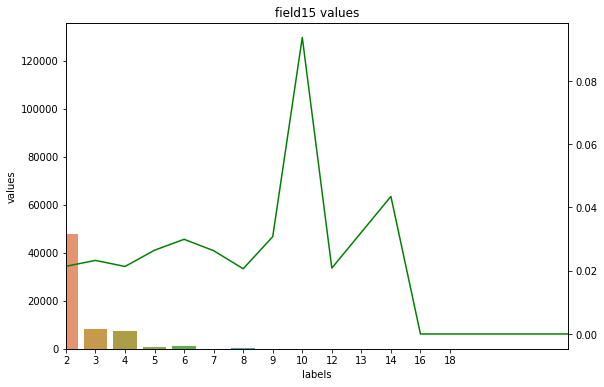

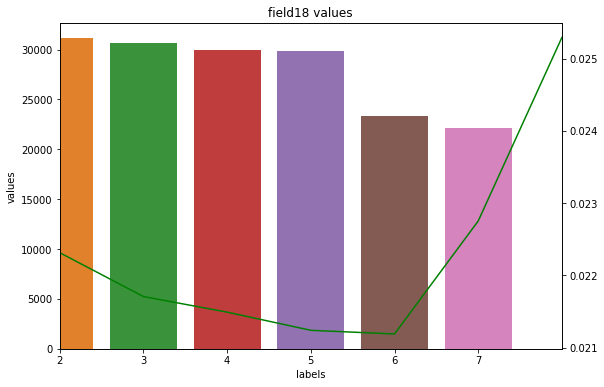

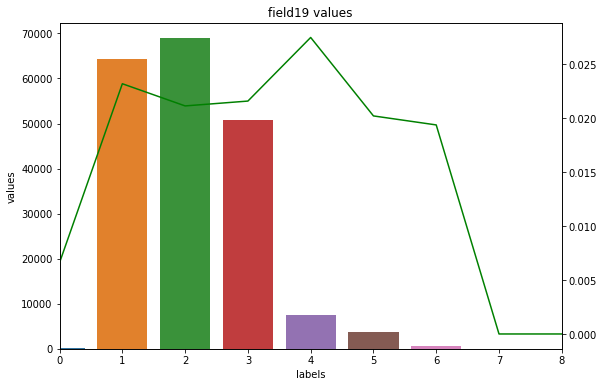

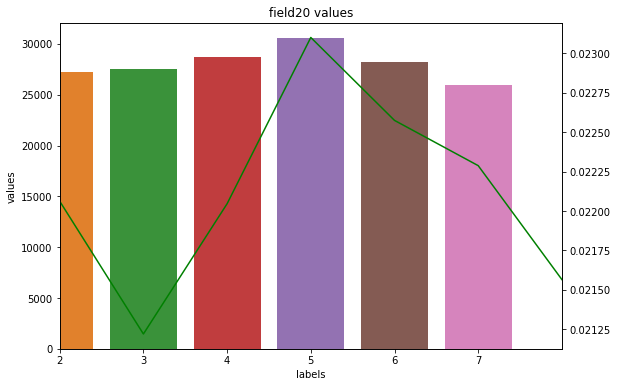

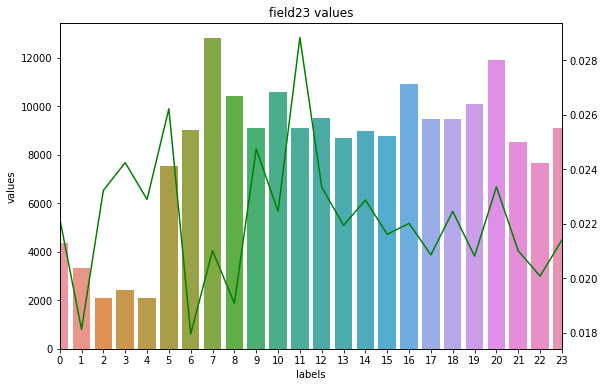

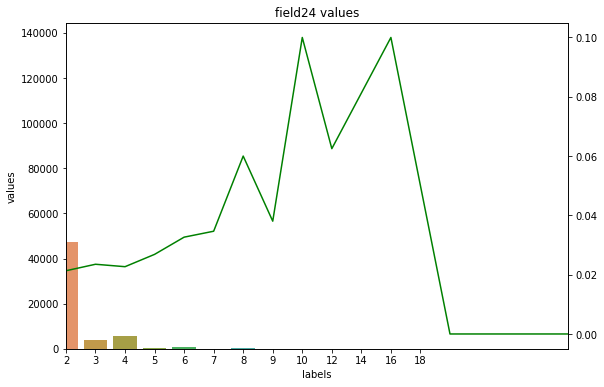

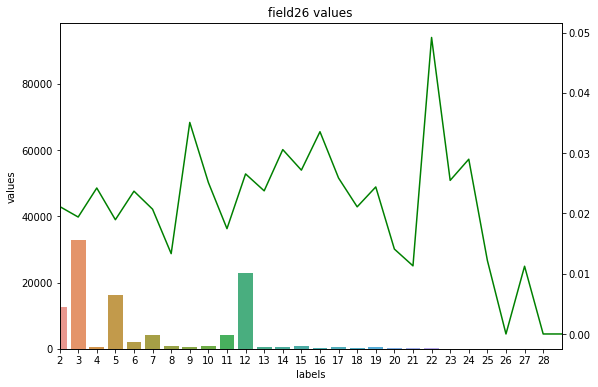

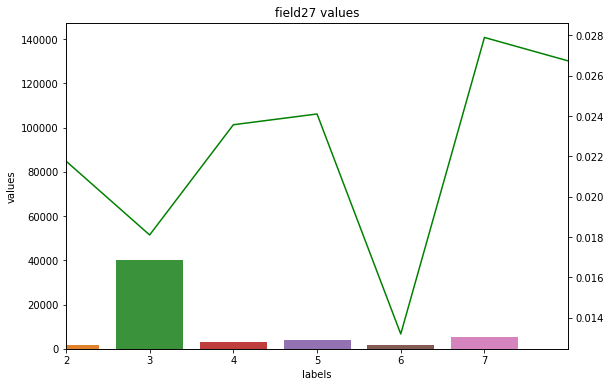

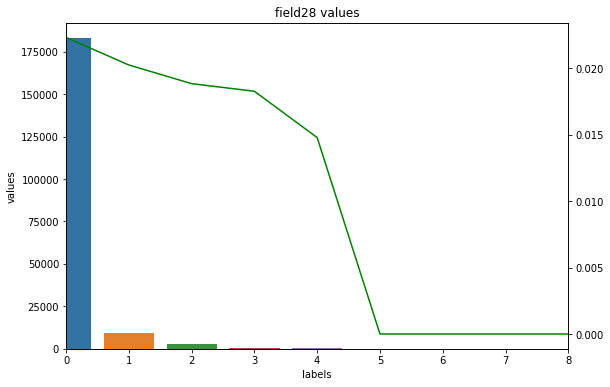

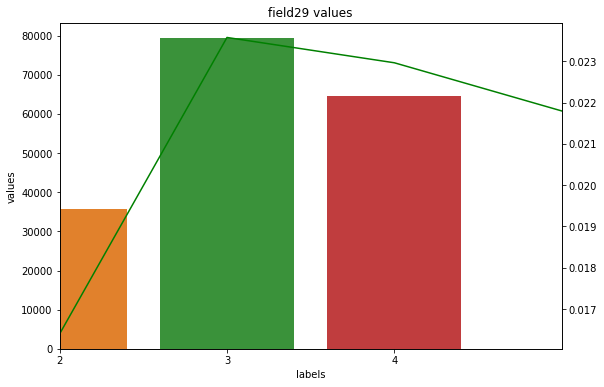

In [116]:
for feat in features:
    if 2< train[feat].value_counts().shape[0] < 30:
        count_values(train,'goal1', feat)

In [102]:
df_gini, ind_gini_to_drop = drop_ind_gini(train, train['goal1'], features, 1, 'ind_gini_12trip', 1)

 feature:  field0
	  Run grid search...
	  True gini is  0.073
-------------------------------------------
 feature:  field1
	  Run grid search...
	  True gini is  0.155
-------------------------------------------
 feature:  field2
	  Run grid search...
	  True gini is  0.064
-------------------------------------------
 feature:  field3
	  Run grid search...
	  True gini is  0.052
-------------------------------------------
 feature:  field4
	  Run grid search...
	  True gini is  0.067
-------------------------------------------
 feature:  field5
	  Run grid search...
	  True gini is  0.049
-------------------------------------------
 feature:  field6
	  Run grid search...
	  True gini is  0.091
-------------------------------------------
 feature:  field7
	  Run grid search...
	  True gini is  0.135
-------------------------------------------
 feature:  field8
	  Run grid search...
	  True gini is  0.063
-------------------------------------------
 feature:  field9
	  Run grid search.

In [117]:
corrs, log, corrs_to_drop = drop_corr(train, df_gini, 0.95, 'corrs_12trip')
print(corrs_to_drop)
log

['field29']


,drop,leave,corr
0,field29,field2,0.953999


Index(['goal1', 'field16', 'field14', 'field1', 'field12', 'field25', 'field7',
       'field22', 'field6', 'field17'],
      dtype='object')


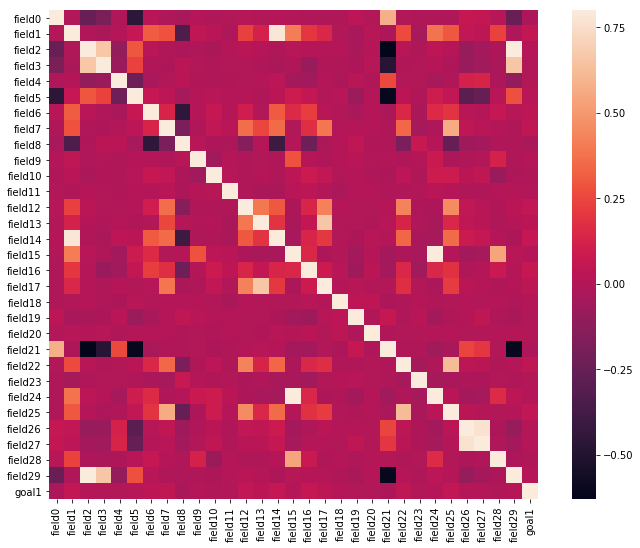

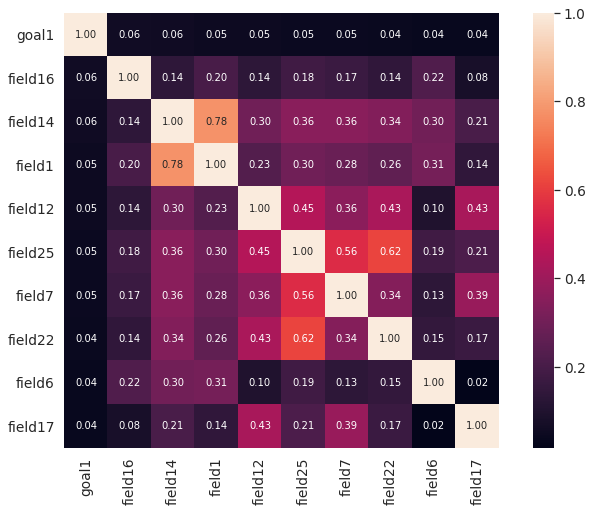

In [13]:
corrs = corr_matrix(df_train[features + ['goal1']])

The correlation between field0 and the TARGET is -0.0163
The correlation between field1 and the TARGET is 0.0505
The correlation between field2 and the TARGET is 0.0054
The correlation between field3 and the TARGET is 0.0006
The correlation between field4 and the TARGET is -0.0036
The correlation between field5 and the TARGET is 0.0146
The correlation between field6 and the TARGET is 0.0400
The correlation between field7 and the TARGET is 0.0451
The correlation between field8 and the TARGET is -0.0287
The correlation between field9 and the TARGET is 0.0034
The correlation between field10 and the TARGET is -0.0118
The correlation between field11 and the TARGET is -0.0004
The correlation between field12 and the TARGET is 0.0489
The correlation between field13 and the TARGET is 0.0271
The correlation between field14 and the TARGET is 0.0587
The correlation between field15 and the TARGET is 0.0083
The correlation between field16 and the TARGET is 0.0632
The correlation between field17 and 

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


The correlation between field24 and the TARGET is 0.0116
The correlation between field25 and the TARGET is 0.0474
The correlation between field26 and the TARGET is 0.0059
The correlation between field27 and the TARGET is 0.0041
The correlation between field28 and the TARGET is -0.0048
The correlation between field29 and the TARGET is 0.0043


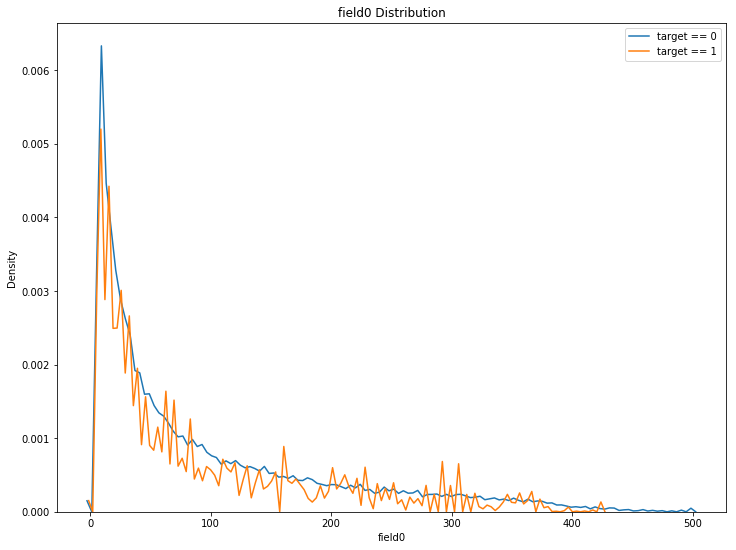

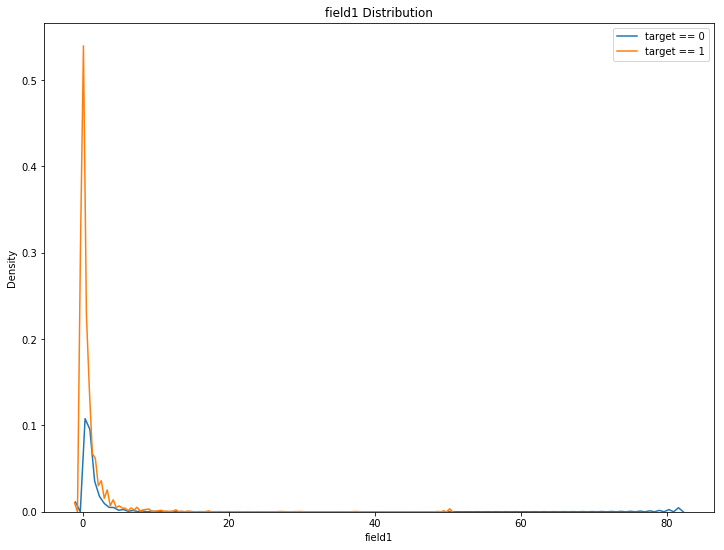

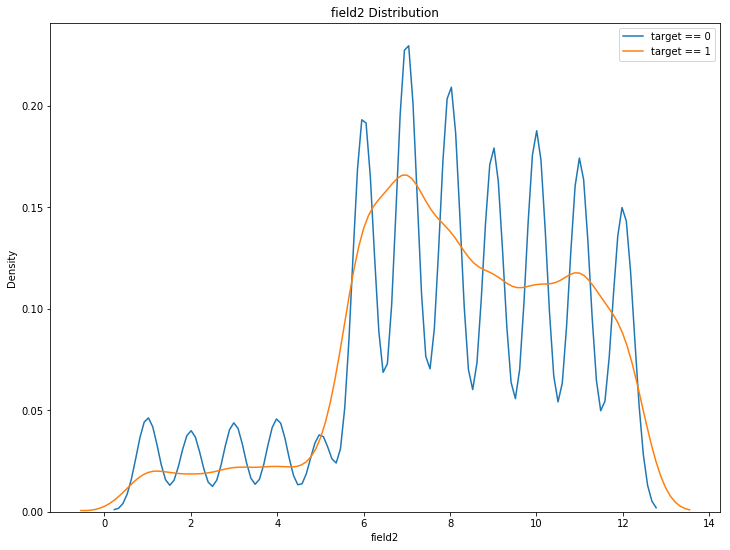

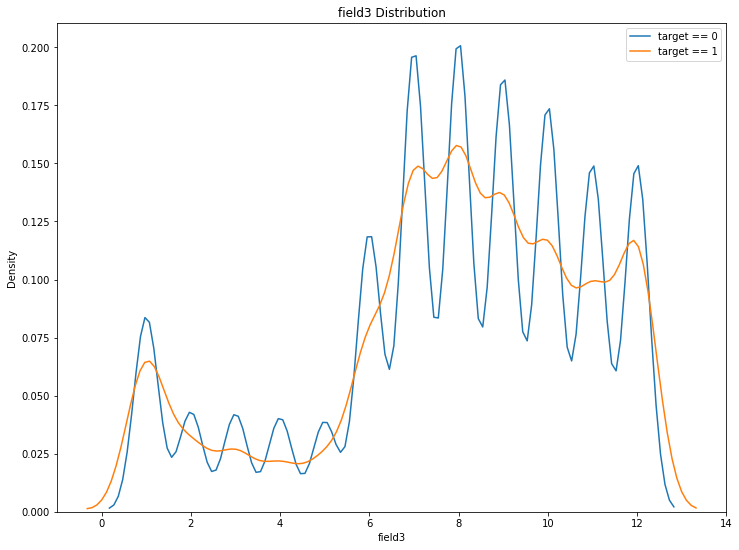

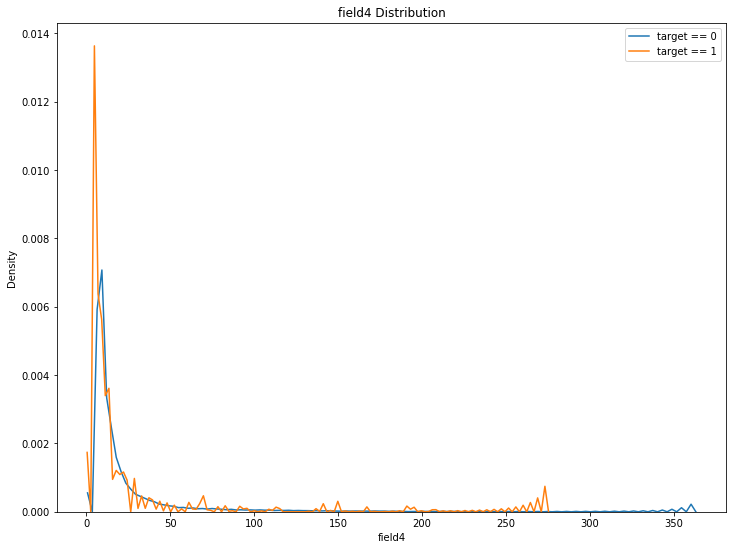

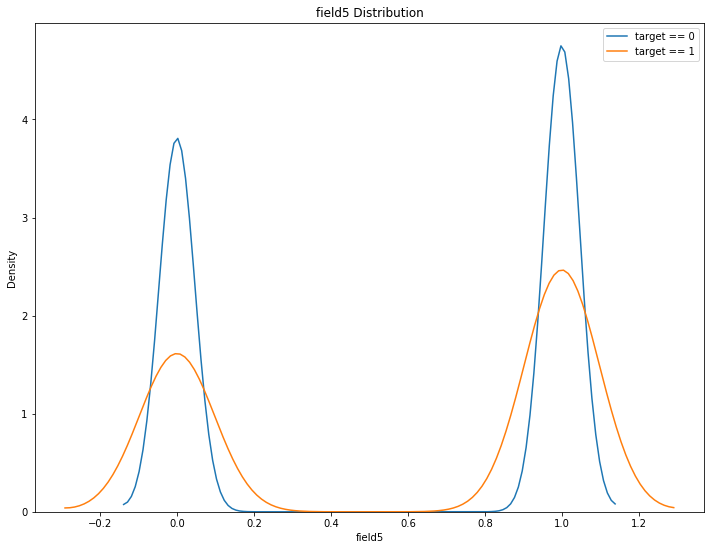

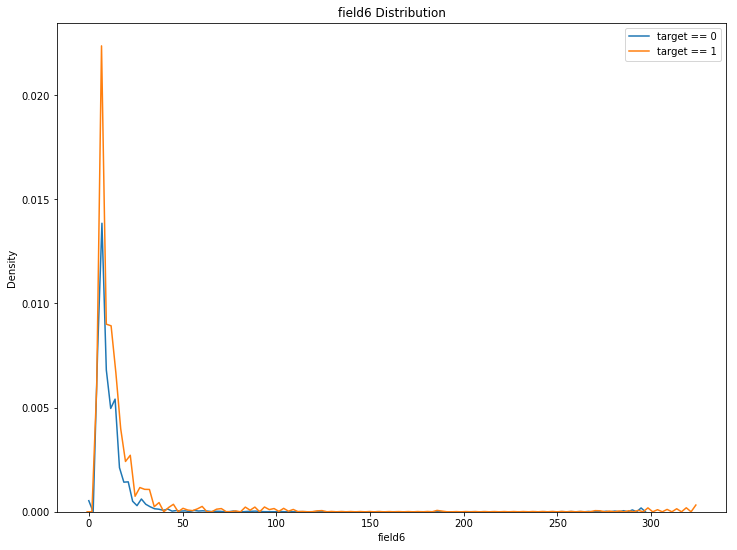

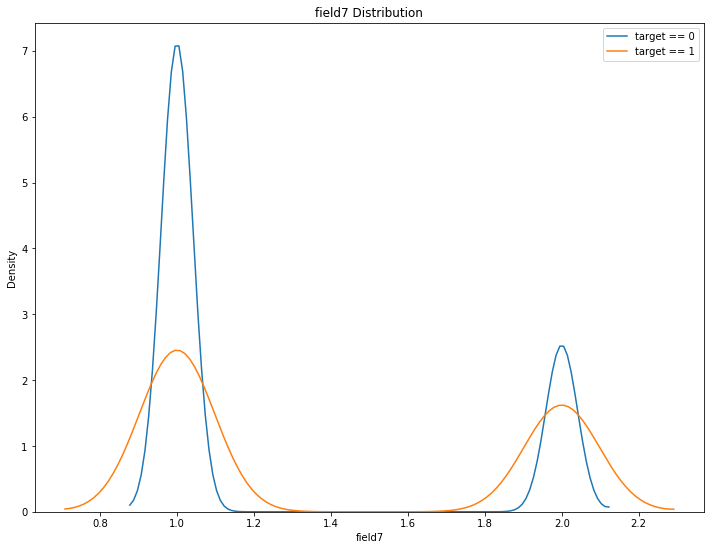

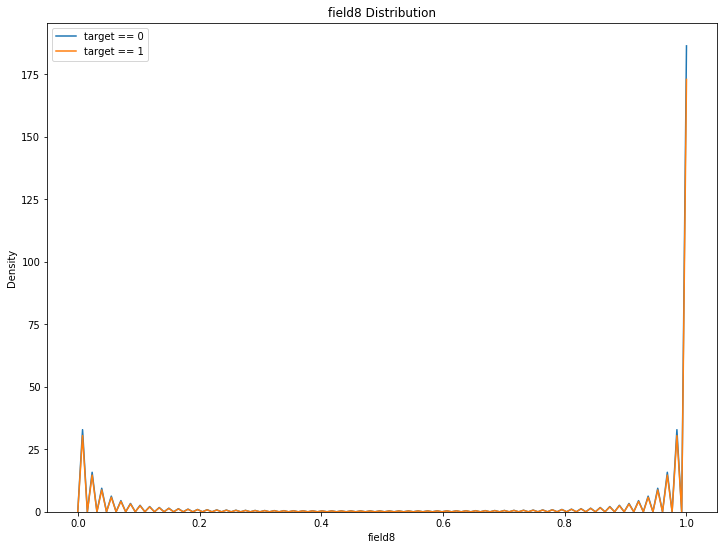

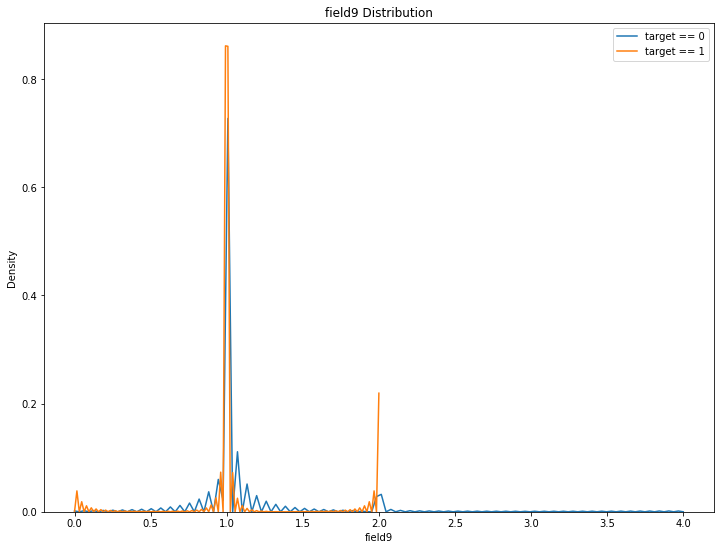

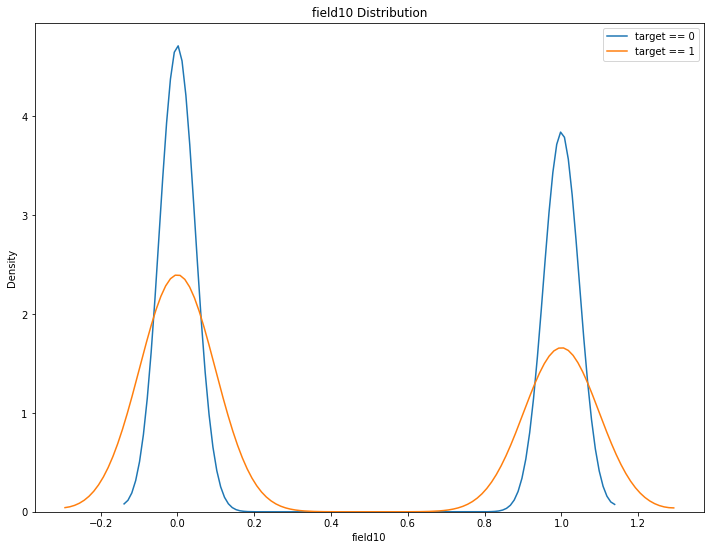

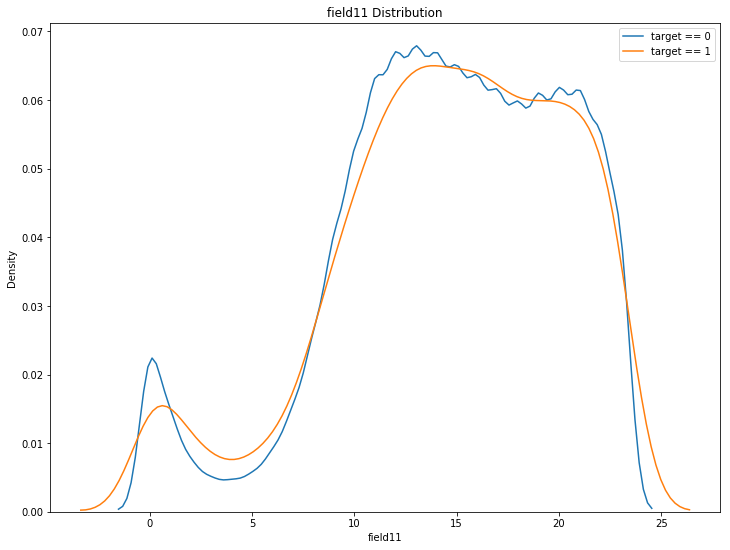

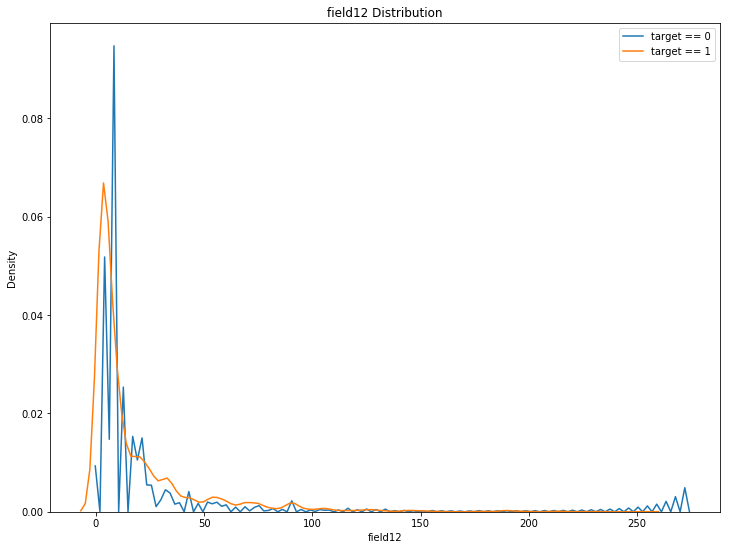

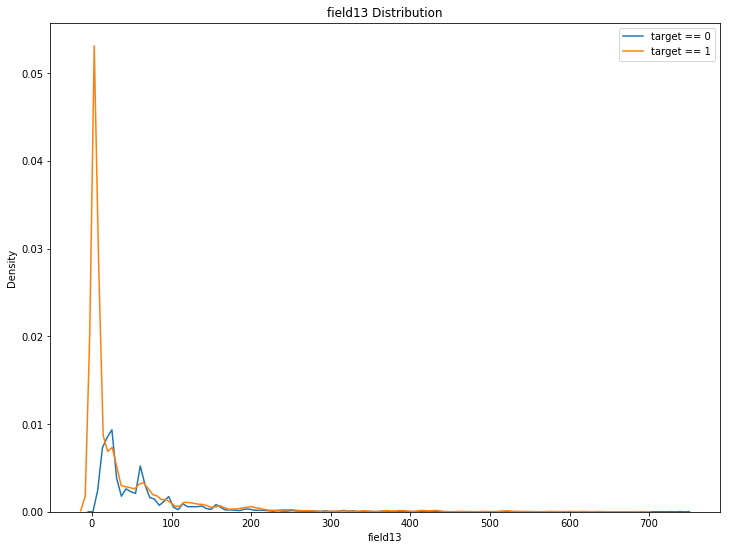

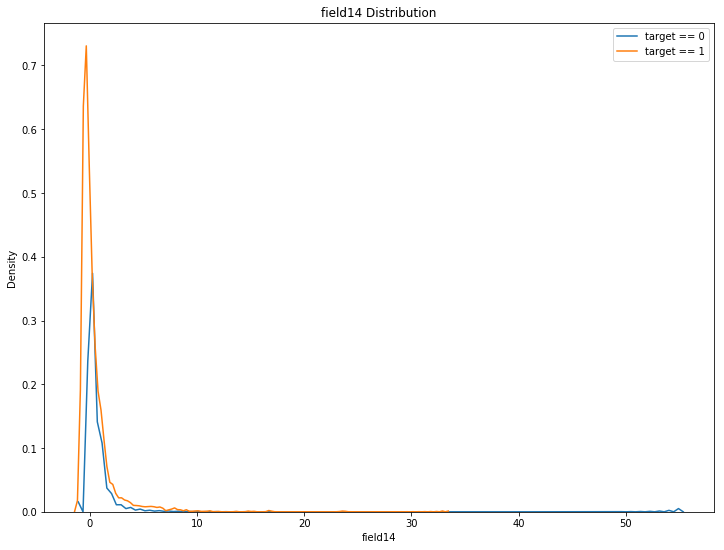

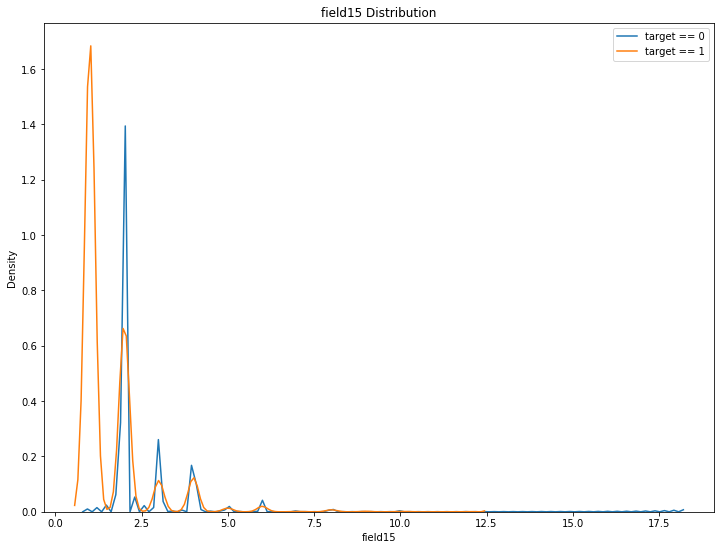

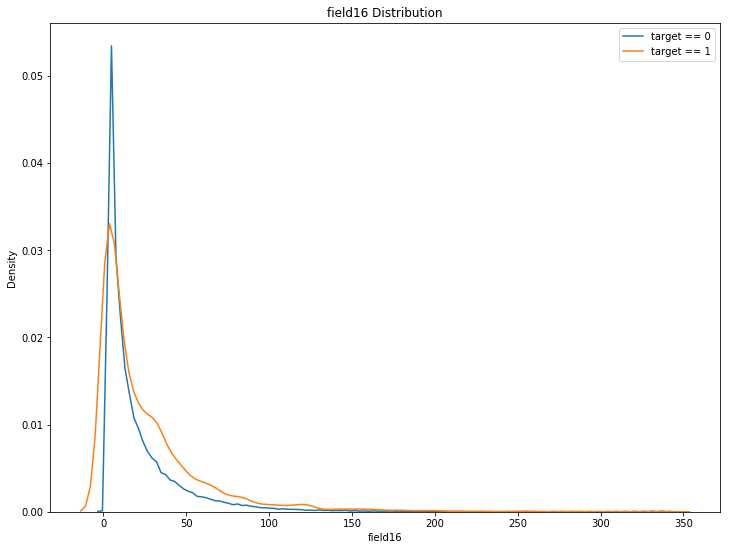

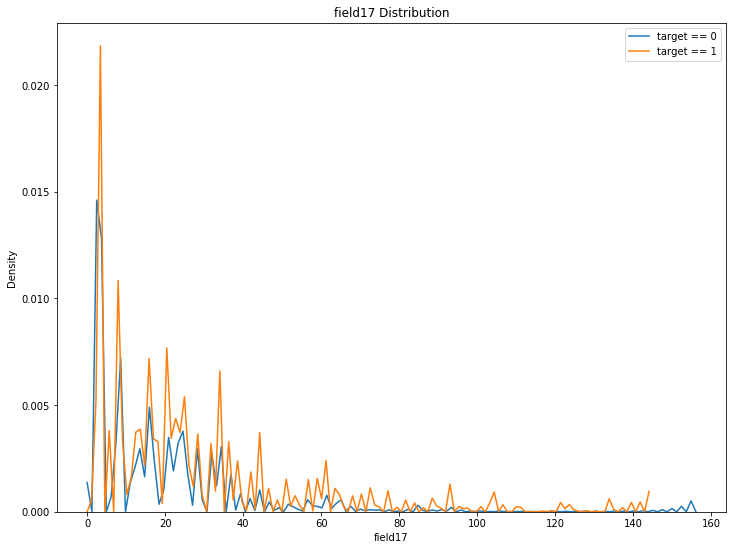

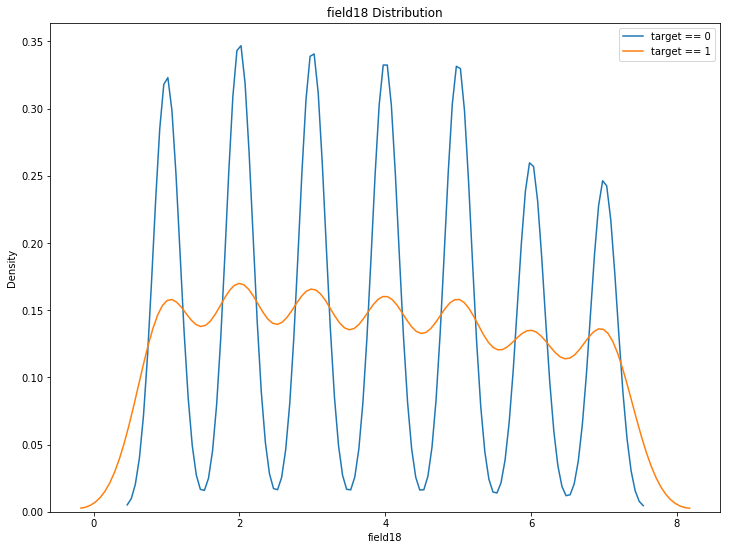

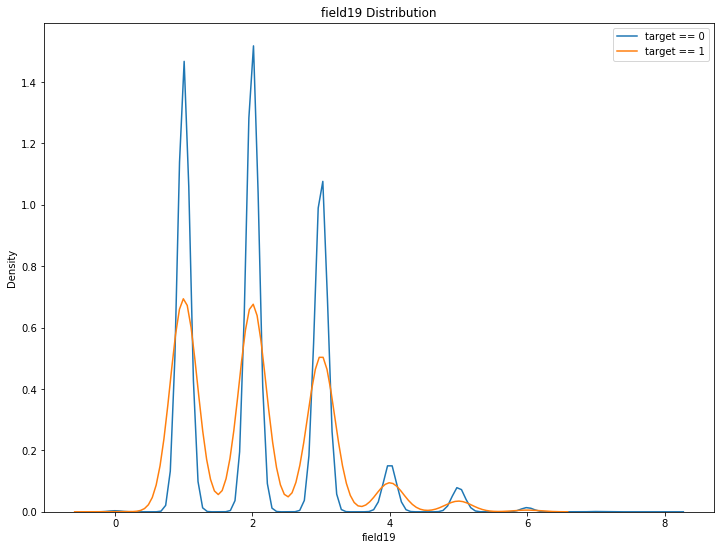

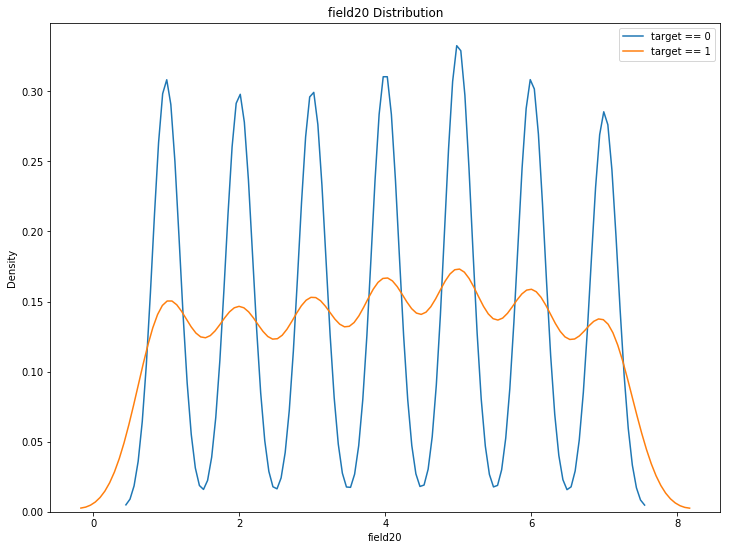

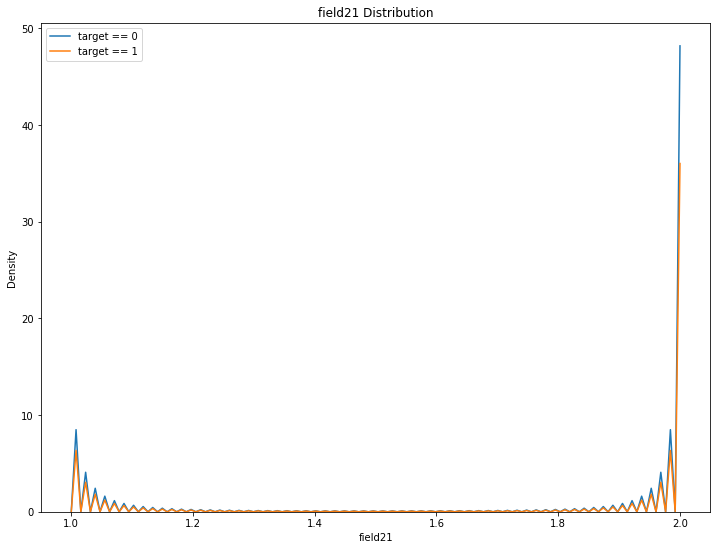

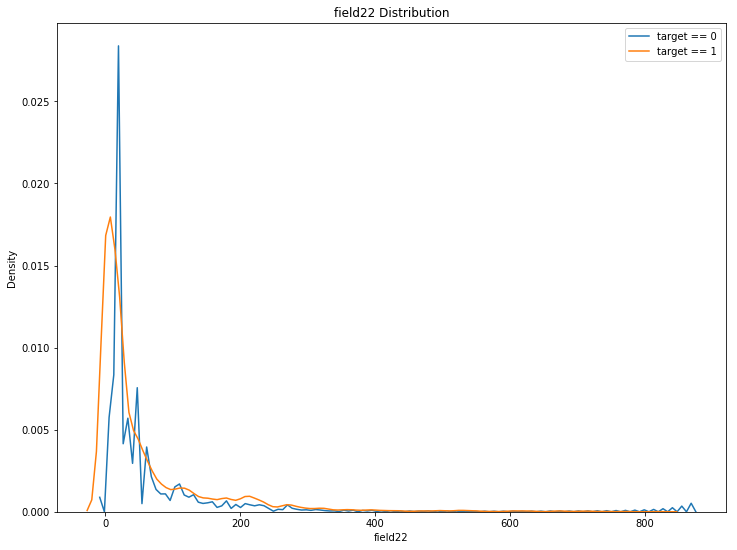

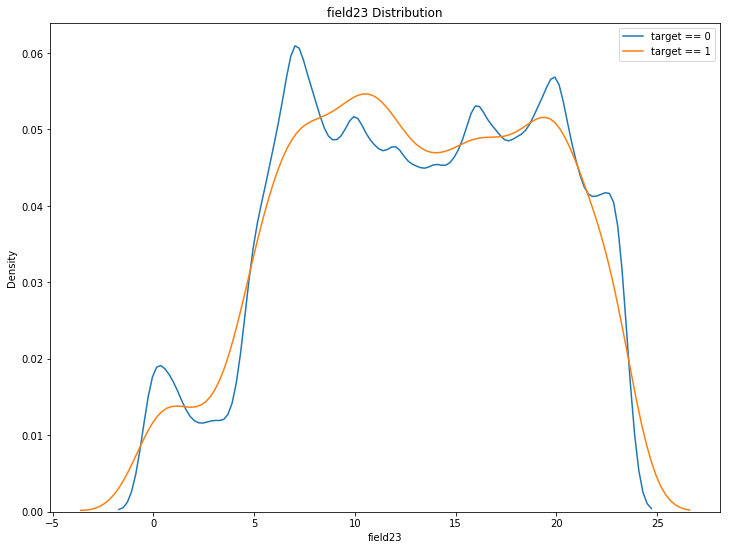

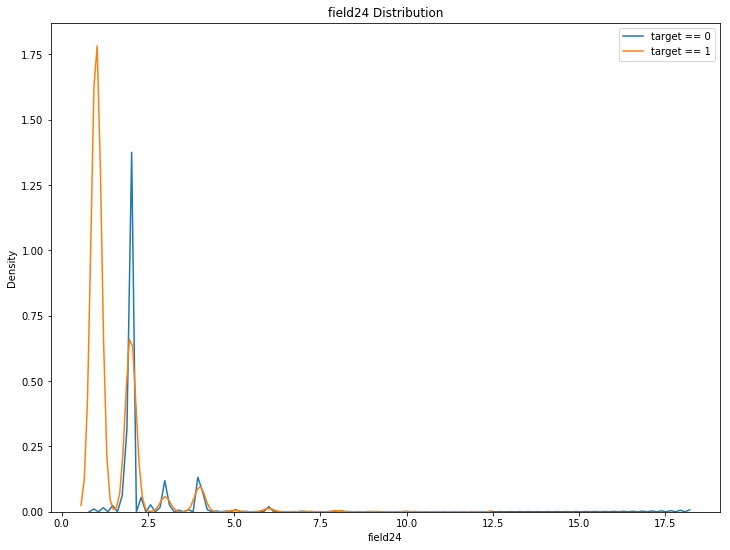

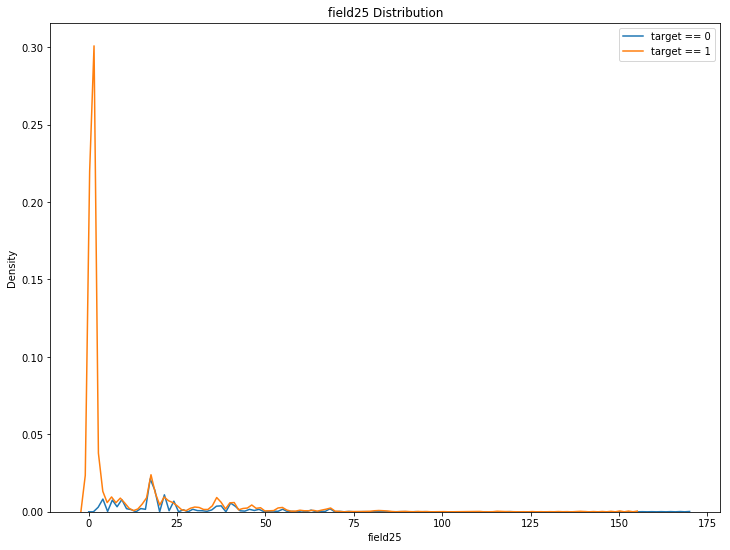

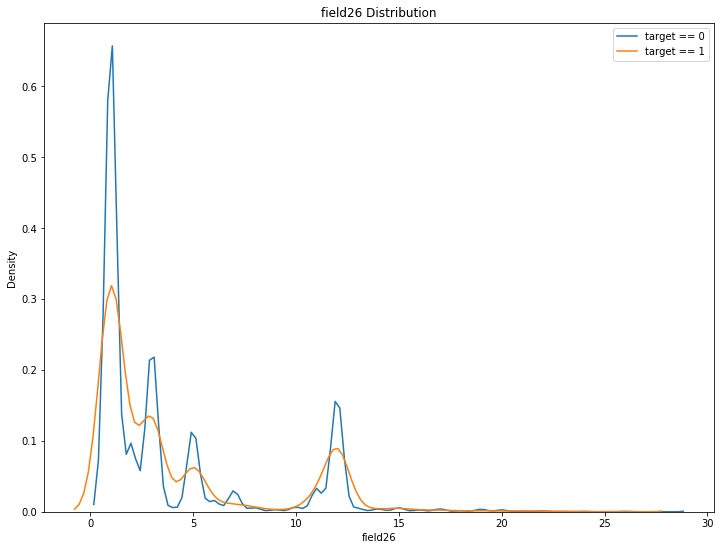

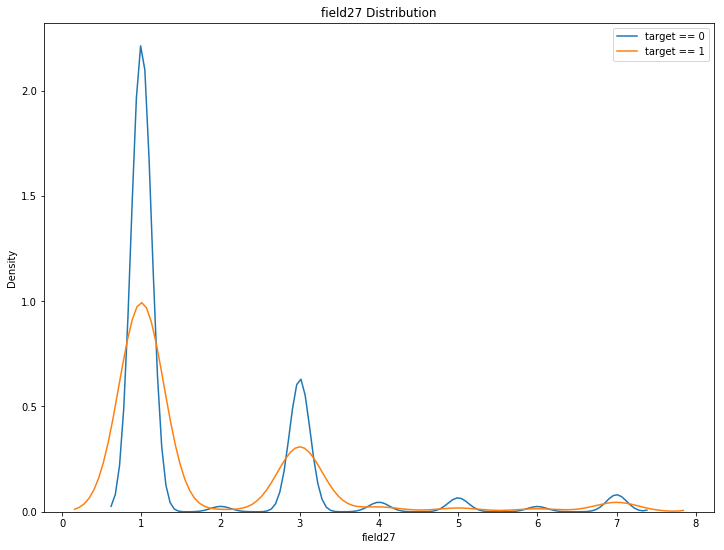

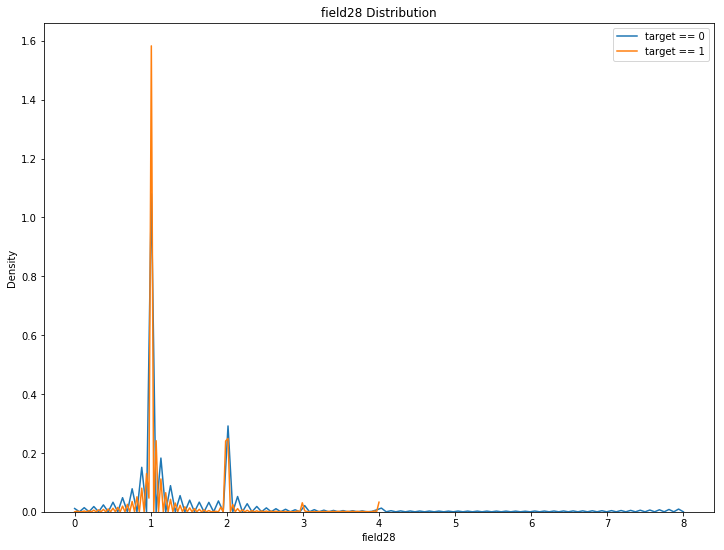

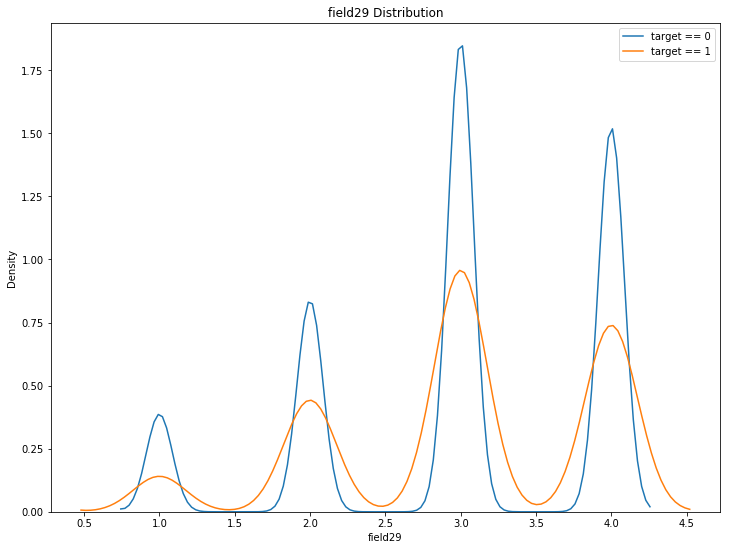

In [5]:
for feat in features:
    kde_target(feat, df_train)

# Model

In [150]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [151]:
# cross validation
scores = cross_val_score(clf, df_train[features], df_train['goal1'], scoring='roc_auc', cv=5)
print(f"{scores.mean()} ± {scores.std()}")

0.6757762444801674 ± 0.012522370752372464


In [8]:
# catBoost for the second task
clf = CatBoostClassifier(logging_level='Silent', random_state=0)

In [9]:
# cross validation
scores = cross_val_score(clf, df_train[features], df_train['goal1'], scoring='roc_auc', cv=5)
print(f"{scores.mean()} ± {scores.std()}")

0.6703055759855848 ± 0.010981968663721938


In [10]:
# fit classifier on the whole dataset
clf.fit(df_train[features], df_train['goal1'])

In [11]:
# get probabilities
proba = clf.predict_proba(df_test[features])

In [9]:
pd.DataFrame(proba[:, 1], columns=['proba'], index=df_test['orderid']).to_csv('sub1.csv')